In [57]:
from tqdm import tqdm
import numpy as np
from requests import get
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Dict
from pprint import pprint as pp
import datetime

In [58]:
def meta_url(datasetID: str,flavor: str = 'json') -> Dict: 
    meta_url: str = f"http://www.neracoos.org/erddap/info/{datasetID}/index.{flavor}"
    return get(meta_url).json() 
def data_url(datasetID: str, flavor: str = 'json') -> Dict:
    data_url: str = f"http://www.neracoos.org/erddap/tabledap/{datasetID}.{flavor}"
    return get(data_url).json() 
GOM_IDS = ["A01", "B01", "C02"]
def make_df(set_name,from_url=True):
    set_name = data_url(set_name)
    response = set_name['table']
    #print(response['columnNames'])
    new_df = pd.DataFrame(response['rows'], columns = response['columnNames'])
    new_df['time'] = pd.to_datetime(new_df['time'])
    new_df = new_df.set_index('time')
    return new_df[new_df.columns[~new_df.columns.str.contains('_qc')]]

In [3]:
df = make_df('A01_optics_s_all')
print(1)
sal_temp = make_df('A01_sbe37_all')[['salinity','temperature','depth']]
print(1)
sal_df = make_df('A01_sbe16_disox_all')
print(1)

sal_df.columns

1
1
1


Index(['station', 'mooring_site_desc', 'dissolved_oxygen', 'oxygen_saturation',
       'percent_oxygen_saturation', 'conductivity', 'temperature', 'salinity',
       'sigma_t', 'longitude', 'latitude', 'depth'],
      dtype='object')

In [32]:
df.drop(['station','mooring_site_desc', 'longitude', 'latitude', 'depth'], axis=1).isna().sum()/len(df)

chlorophyll    0.040270
turbidity      0.032998
dtype: float64

In [33]:
df.columns

Index(['station', 'mooring_site_desc', 'chlorophyll', 'turbidity', 'longitude',
       'latitude', 'depth'],
      dtype='object')

In [56]:
dfs

NameError: name 'dfs' is not defined

In [34]:
plt.plot(new_df['chlorophyll'].tail(16419).resample('D').mean())

KeyError: 'chlorophyll'

In [4]:
def fix_index(dff, col):
    x = 0
    dups = []
    notna = []
    new_col = []
    new_df = pd.DataFrame(columns = dff.columns, index = list(set(dff.index)))
    new_df = new_df.loc[new_df.index.sort_values()]
    for i in new_df.index:
        if dff[col].loc[i].index.name == 'time':
            val = dff[col].loc[i].values[0]
        else:
            val = dff[col].loc[i].values
        if not np.isnan(val).any():
            notna.append(i)
        new_col.append(val)
    return new_col

In [5]:
sal_col = fix_index(sal_df,['dissolved_oxygen', 'oxygen_saturation',
       'percent_oxygen_saturation', 'conductivity', 'temperature', 'salinity',
       'sigma_t'])

In [7]:
sal_names = ['dissolved_oxygen', 'oxygen_saturation',
       'percent_oxygen_saturation', 'conductivity', 'temperature', 'salinity',
       'sigma_t']
new_df = pd.DataFrame(columns = sal_df.columns, index = list(set(list(sal_df.index))))
new_df = new_df.loc[new_df.index.sort_values()]
new_df[sal_names] = sal_col
x = list(set([i for i in sal_df.index if i in df.index]))
y = [i for i in sal_df.index if i in x]
new_df = new_df.loc[y]

In [ ]:
chlor_col = fix_index(df,['turbidity','chlorophyll'])

In [12]:
new_df[['turbidity','chlorophyll']]=chlor_col

In [13]:
fill_df = new_df.interpolate(method='index')
g = fill_df.isna().all()
A01 = fill_df.drop(g.index[g], axis=1)

In [5]:
import matplotlib.pyplot as plt

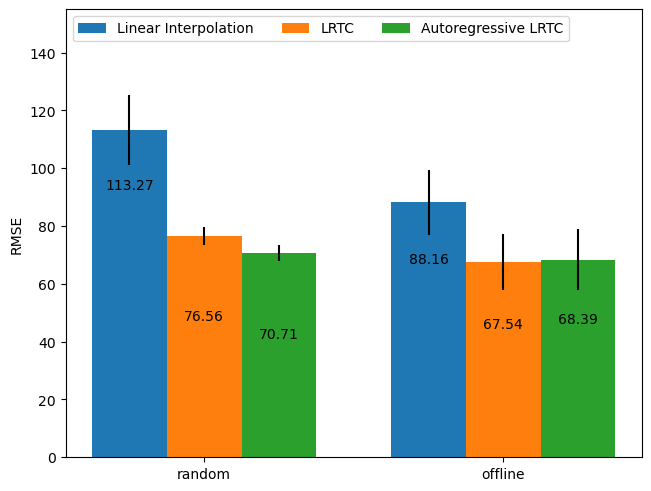

In [48]:

import matplotlib.pyplot as plt
import numpy as np
res = np.array([[113.27402,76.5582,70.71358],
[88.1575, 67.54, 68.39]]).round(2)

err = np.array([[12.12951806,
3.273330846,
2.886650956],[11.38059066,9.751502271
,10.58095626]])
species = ("random", "offline")
penguin_means = {
    'Linear Interpolation': (res.transpose()[0],err.transpose()[0]),
    'LRTC':  (res.transpose()[1],err.transpose()[1]),
     'Autoregressive LRTC': (res.transpose()[2],err.transpose()[2])
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset,measurement[0], width,yerr = measurement[1], label=attribute)
    ax.bar_label(rects, padding=-70)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 155)

plt.show()

Text(0, 0.5, 'RMSE')

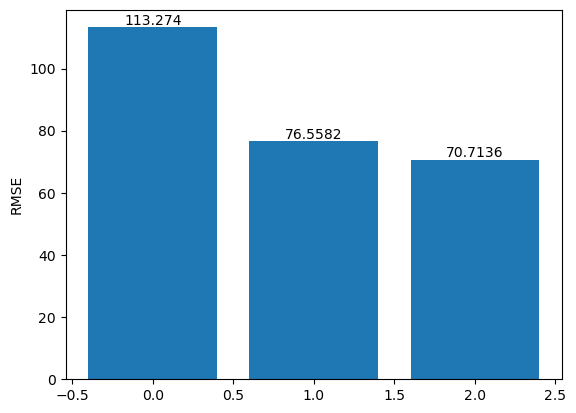

In [20]:
means = [113.27402,76.5582,70.71358]
lab = ['Linear', 'LRTC', 'Autoregressive LRTC']
fig,ax = plt.subplots(1,1)
x = [0,1,2]
rect1 = ax.bar(x, means,label = lab)
ax.bar_label(rect1, )
ax.set_ylabel('RMSE')

In [20]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
    # slicing the past and future parts of the window
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)


In [21]:
salX = fill_df[sal_names].interpolate(method='index')

In [109]:
= salX[1:10081].resample('D').mean(), salX[10081:].resample('D').mean()

In [96]:
len(sal_names)

7

In [196]:
train_df,test_df = salX.loc[salX.isna().sum(axis=1)==0].tail(16817).resample('D').mean()[:525],salX.loc[salX.isna().sum(axis=1)==0].tail(16817).resample('D').mean()[525:]

In [200]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

In [201]:
n_past = 20
n_future = 20
n_features = 7

X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [202]:
# E1D1
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

#
model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

#
model_e1d1.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 20, 7)]      0           []                               
                                                                                                  
 lstm_28 (LSTM)                 [(None, 100),        43200       ['input_10[0][0]']               
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 repeat_vector_9 (RepeatVector)  (None, 20, 100)     0           ['lstm_28[0][0]']                
                                                                                            

In [203]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 20, 7)]      0           []                               
                                                                                                  
 lstm_30 (LSTM)                 [(None, 20, 100),    43200       ['input_11[0][0]']               
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 lstm_31 (LSTM)                 [(None, 100),        80400       ['lstm_30[0][0]']                
                                 (None, 100),                                              

In [204]:
np.isnan(X_train).sum().sum()

0

In [206]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e1d1=model_e1d1.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32,verbose=1,callbacks=[reduce_lr])
model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32,verbose=1,callbacks=[reduce_lr])


Epoch 1/10
16/16 [==============================] - 2s 35ms/step - loss: 0.0208 - val_loss: 0.0114 - lr: 0.0010
Epoch 2/10
16/16 [==============================] - 0s 18ms/step - loss: 0.0171 - val_loss: 0.0124 - lr: 9.0000e-04
Epoch 3/10
16/16 [==============================] - 0s 18ms/step - loss: 0.0157 - val_loss: 0.0130 - lr: 8.1000e-04
Epoch 4/10
16/16 [==============================] - 0s 18ms/step - loss: 0.0147 - val_loss: 0.0126 - lr: 7.2900e-04
Epoch 5/10
16/16 [==============================] - 0s 18ms/step - loss: 0.0134 - val_loss: 0.0127 - lr: 6.5610e-04
Epoch 6/10
16/16 [==============================] - 0s 18ms/step - loss: 0.0128 - val_loss: 0.0206 - lr: 5.9049e-04
Epoch 7/10
16/16 [==============================] - 0s 18ms/step - loss: 0.0120 - val_loss: 0.0179 - lr: 5.3144e-04
Epoch 8/10
16/16 [==============================] - 0s 18ms/step - loss: 0.0113 - val_loss: 0.0193 - lr: 4.7830e-04
Epoch 9/10
16/16 [==============================] - 0s 18ms/step - loss: 0.0

In [207]:
pred_e1d1=model_e1d1.predict(X_test)
pred_e2d2=model_e2d2.predict(X_test)
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])

5/5 [==============================] - 0s 9ms/step


In [58]:
np.array([model_e2d2.predict(X_test[0:1])[0]]).shape

1/1 [==============================] - 0s 19ms/step


(1, 50, 7)

In [15]:
seed = np.array([model_e2d2.predict(X_test[0:1])[0]])
pred = [seed]
for i in range(10):
    pred.append(np.array([model_e2d2.predict(pred[-1])[0]]))

NameError: name 'model_e2d2' is not defined

In [156]:
true = list(X_test[1,:,:])
for i in range(len(pred)):
    fcast = fcast+list(p[0,:,:])

In [211]:
fcast = list(pred[0][0,:,:])
for p in pred[1:]:
    fcast = fcast+list(p[0,:,:])


In [219]:
fcast = scaler.inverse_transform(fcast)

In [160]:
fcast

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [49]:
train_df.columns

NameError: name 'train_df' is not defined

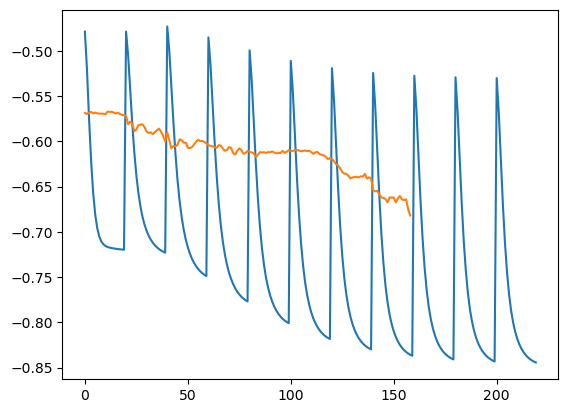

In [220]:
plt.plot(np.array(fcast)[:,0])
plt.plot(test_df[test_df.columns[0]].iloc[20:].values)

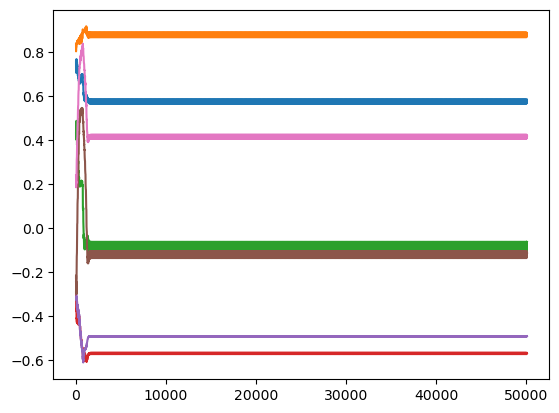

In [81]:
plt.plot(fcast)

1/1 [==============================] - 0s 14ms/step


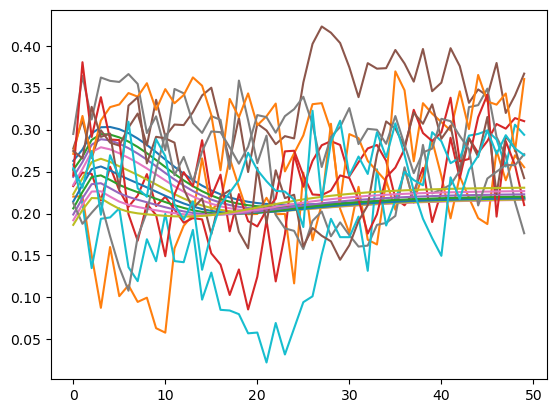

In [77]:
for i in range(10):
    plt.plot(model_e2d2.predict(X_train[i:i+1])[0][:,0])
    plt.plot(X_train[50*(i+1),:,0])

In [28]:
from sklearn.metrics import mean_absolute_error
for index,i in enumerate(train_df.columns):
    print(i)
    print(mean_absolute_error(y_test[:,:,index],pred_e1d1[:,:,index]))

dissolved_oxygen
0.8914411327817463
oxygen_saturation
0.15170792726735555
percent_oxygen_saturation
6.075536190528854
conductivity
0.28672667517714545
temperature
0.264571242193233
salinity
0.10418384415623745
sigma_t
0.1004885365683024


In [29]:
A01f = A01.tail(16419)

In [51]:
plt.plot(A01f['chlorophyll'])

NameError: name 'A01f' is not defined

(12024, 5, 7)

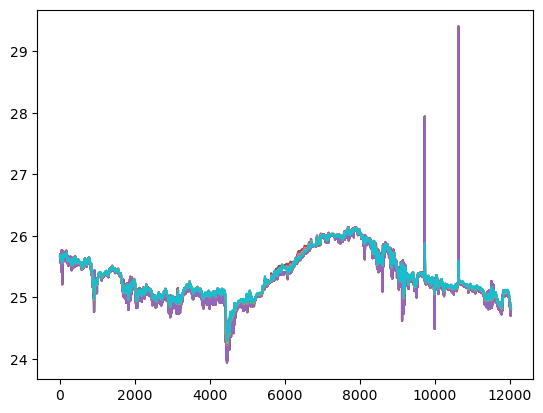

In [52]:
plt.plot(y_test[:,:,index])
plt.plot(pred_e1d1[:,:,index])

In [73]:
from sklearn.metrics import mean_absolute_error
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,6):
        print("Day ",j,":")
        print("MAE-E1D1 : ",mean_absolute_error(y_test[:,j-1,index],pred_e1d1[:,j-1,index]),end=", ")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred_e2d2[:,j-1,index]))
    print()
    print()

dissolved_oxygen
Day  1 :
MAE-E1D1 :  0.14792117326206805, MAE-E2D2 :  0.1662373080247709
Day  2 :
MAE-E1D1 :  0.15856322793667368, MAE-E2D2 :  0.1362619731019982
Day  3 :
MAE-E1D1 :  0.17135070108713563, MAE-E2D2 :  0.1476128919135254
Day  4 :
MAE-E1D1 :  0.1758573793700458, MAE-E2D2 :  0.1559484216289626
Day  5 :
MAE-E1D1 :  0.17516870786464092, MAE-E2D2 :  0.15974102968420223


oxygen_saturation
Day  1 :
MAE-E1D1 :  0.03940914887784707, MAE-E2D2 :  0.39029117112361783
Day  2 :
MAE-E1D1 :  0.050954249662725354, MAE-E2D2 :  0.33410809738021335
Day  3 :
MAE-E1D1 :  0.06211651764596605, MAE-E2D2 :  0.3006664139968825
Day  4 :
MAE-E1D1 :  0.060980687637053034, MAE-E2D2 :  0.280253485511422
Day  5 :
MAE-E1D1 :  0.059151232642131166, MAE-E2D2 :  0.2684594651225323


percent_oxygen_saturation
Day  1 :
MAE-E1D1 :  0.5403047499242789, MAE-E2D2 :  0.673237844376803
Day  2 :
MAE-E1D1 :  1.1296436997659254, MAE-E2D2 :  0.7200035115294472
Day  3 :
MAE-E1D1 :  1.375769796411959, MAE-E2D2 :  0.7974

In [3]:
aand = make_df("A01_optics_s_all")

In [59]:
META_DATA: Dict = data_url('allDatasets')
meta_0: pd.DataFrame = pd.DataFrame(META_DATA['table']['rows'],columns=META_DATA['table']['columnNames'])
meta = meta_0.set_index('datasetID')
meta = meta.drop(meta["minLongitude"].idxmin())

In [79]:
meta

,accessible,institution,dataStructure,cdm_data_type,class,title,minLongitude,maxLongitude,longitudeSpacing,minLatitude,...,fgdc,iso19115,metadata,sourceUrl,infoUrl,rss,email,testOutOfDate,outOfDate,summary
datasetID,,,,,,,,,,,,,,,,,,,,,
allDatasets,public,NERACOOS,table,Other,EDDTableFromAllDatasets,* The List of All Active Datasets in this ERDD...,NaN,NaN,NaN,NaN,...,,,http://www.neracoos.org/erddap/info/allDataset...,http://www.neracoos.org/erddap,http://www.neracoos.org/erddap,http://www.neracoos.org/erddap/rss/allDatasets...,,,NaN,This dataset is a table which has a row of inf...
A01_aanderaa_hist,public,Univ. of Maine,table,TimeSeries,EDDTableFromNcCFFiles,A01 Aanderaa - Historic Surface Currents,-70.56522,-70.56522,NaN,42.51807,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/A01_aander...,(local files),http://www.neracoos.org/,http://www.neracoos.org/erddap/rss/A01_aandera...,,,NaN,Ocean observation data from the Northeastern R...
A01_aanderaa_o2_all,public,"Department of Physical Oceanography, School of...",table,TimeSeries,EDDTableFromNcCFFiles,A01 Aanderaa - Realtime Surface Currents and O2,-70.56640,-70.56550,NaN,42.52320,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/A01_aander...,(local files),http://gyre.umeoce.maine.edu/data/gomoos/buoy/...,http://www.neracoos.org/erddap/rss/A01_aandera...,,,NaN,Ocean observation data from the Northeastern R...
A01_accelerometer_all,public,Univ. of Maine,table,TimeSeries,EDDTableFromNcCFFiles,A01 Accelerometer - Waves,-70.56550,-70.56550,NaN,42.52320,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/A01_accele...,(local files),http://www.neracoos.org,http://www.neracoos.org/erddap/rss/A01_acceler...,,,NaN,Ocean observation data from the Northeastern R...
A01_waves_mstrain_all,public,Univ. of Maine,table,TimeSeries,EDDTableFromNcCFFiles,A01 Directional Waves,-70.56592,-70.56550,NaN,42.52320,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/A01_waves_...,(local files),http://www.neracoos.org/,http://www.neracoos.org/erddap/rss/A01_waves_m...,,,NaN,Ocean observation data from the Northeastern R...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WHOI_ESP_JAKE_Cell_Count,public,Woods Hole Oceanographic Institute - The Ander...,table,Point,EDDTableFromAsciiFiles,WHOI ESP - JAKE Cell Count,-66.94500,-66.48650,NaN,44.38200,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/WHOI_ESP_J...,(local files),https://www.whoi.edu/,http://www.neracoos.org/erddap/rss/WHOI_ESP_JA...,,,NaN,Woods Hole Oceanographic Institution (WHOI)-ES...
WHOI_ESP_JAKE_CTD,public,Woods Hole Oceanographic Institute - The Ander...,table,TimeSeries,EDDTableFromAsciiFiles,WHOI ESP - JAKE CTD (provisional),-69.97680,-69.97680,NaN,43.68720,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/WHOI_ESP_J...,(local files),https://www.whoi.edu,http://www.neracoos.org/erddap/rss/WHOI_ESP_JA...,,,NaN,MERHAB: GOM-ESP JAKE CTD
WHOI_ESP_ROMAN_Cell_Count,public,Woods Hole Oceanographic Institute - The Ander...,table,Point,EDDTableFromAsciiFiles,WHOI ESP - ROMAN Cell Count,-67.29500,-67.29460,NaN,44.56800,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/WHOI_ESP_R...,(local files),https://www.whoi.edu/,http://www.neracoos.org/erddap/rss/WHOI_ESP_RO...,,,NaN,Woods Hole Oceanographic Institution (WHOI)-ES...


In [87]:
for j,i in enumerate(['J04_optics_all', 'UNH_CML_realtime', 'UNH_CO2_realtime', 'UNH_GBB',
       'LOBO_CSV_66', 'LOBO_CSV_65', 'LOBO_CSV_64', 'LOBO_CSV_67',
       'LOBO_CSV_70', 'LOBO_CSV_72', 'D03_optics_all', 'C05_optics_all',
       'A01_optics_s_all', 'URI_169-QP_SurfaceSonde', 'URI_CPoint_BottomSonde',
       'URI_CPoint_SurfaceSonde', 'URI_GBay_BottomSonde',
       'URI_GBay_SurfaceSonde', 'URI_NP_BottomSonde', 'URI_NP_SurfaceSonde',
       'URI_PP_BottomSonde', 'URI_PP_SurfaceSonde']):
    bs = "\\"
    print(f"@misc{{data{j}, title={{{meta.loc[i]['title']}}}, author={{{meta.loc[i]['institution']}}}, year ={{2023}}, howpublished={{{bs}url{{{meta.loc[i]['metadata']}}}}}}}")

@misc{data0, title={J04 Optics Sensor(Machias Bay)}, author={UMaine}, year ={2023}, howpublished={\url{http://www.neracoos.org/erddap/info/J04_optics_all/index}}}
@misc{data1, title={UNH CML Station, realtime - Coastal Marine Laboratory}, author={Univ. of New Hampshire - Ocean Process Analysis Laboratory- University of New Hampshire}, year ={2023}, howpublished={\url{http://www.neracoos.org/erddap/info/UNH_CML_realtime/index}}}
@misc{data2, title={UNH CO2 Station, realtime - Coastal Marine Laboratory}, author={Univ. of New Hampshire - Ocean Process Analysis Laboratory- University of New Hampshire}, year ={2023}, howpublished={\url{http://www.neracoos.org/erddap/info/UNH_CO2_realtime/index}}}
@misc{data3, title={UNH Great Bay Buoy}, author={Ocean Process Analysis Laboratory- University of New Hampshire}, year ={2023}, howpublished={\url{http://www.neracoos.org/erddap/info/UNH_GBB/index}}}
@misc{data4, title={LOBO 1 Buoy Upper Damariscotta River}, author={Univ. of Maine}, year ={2023}, h

In [84]:
for i in range(22):
    print(f'{bs}cite{{data{i}}}')

\cite{data0}
\cite{data1}
\cite{data2}
\cite{data3}
\cite{data4}
\cite{data5}
\cite{data6}
\cite{data7}
\cite{data8}
\cite{data9}
\cite{data10}
\cite{data11}
\cite{data12}
\cite{data13}
\cite{data14}
\cite{data15}
\cite{data16}
\cite{data17}
\cite{data18}
\cite{data19}
\cite{data20}
\cite{data21}


In [5]:
meta['BuoyID'] = df.apply(lambda row: str(row.index).split("_")[0], axis = 1)

NameError: name 'df' is not defined

In [138]:
meta.

,accessible,institution,dataStructure,cdm_data_type,class,title,minLongitude,maxLongitude,longitudeSpacing,minLatitude,...,fgdc,iso19115,metadata,sourceUrl,infoUrl,rss,email,testOutOfDate,outOfDate,summary
datasetID,,,,,,,,,,,,,,,,,,,,,
allDatasets,public,NERACOOS,table,Other,EDDTableFromAllDatasets,* The List of All Active Datasets in this ERDD...,NaN,NaN,NaN,NaN,...,,,http://www.neracoos.org/erddap/info/allDataset...,http://www.neracoos.org/erddap,http://www.neracoos.org/erddap,http://www.neracoos.org/erddap/rss/allDatasets...,,,NaN,This dataset is a table which has a row of inf...
A01_aanderaa_hist,public,Univ. of Maine,table,TimeSeries,EDDTableFromNcCFFiles,A01 Aanderaa - Historic Surface Currents,-70.56522,-70.56522,NaN,42.51807,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/A01_aander...,(local files),http://www.neracoos.org/,http://www.neracoos.org/erddap/rss/A01_aandera...,,,NaN,Ocean observation data from the Northeastern R...
A01_aanderaa_o2_all,public,"Department of Physical Oceanography, School of...",table,TimeSeries,EDDTableFromNcCFFiles,A01 Aanderaa - Realtime Surface Currents and O2,-70.56640,-70.56550,NaN,42.52320,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/A01_aander...,(local files),http://gyre.umeoce.maine.edu/data/gomoos/buoy/...,http://www.neracoos.org/erddap/rss/A01_aandera...,,,NaN,Ocean observation data from the Northeastern R...
A01_accelerometer_all,public,Univ. of Maine,table,TimeSeries,EDDTableFromNcCFFiles,A01 Accelerometer - Waves,-70.56550,-70.56550,NaN,42.52320,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/A01_accele...,(local files),http://www.neracoos.org,http://www.neracoos.org/erddap/rss/A01_acceler...,,,NaN,Ocean observation data from the Northeastern R...
A01_waves_mstrain_all,public,Univ. of Maine,table,TimeSeries,EDDTableFromNcCFFiles,A01 Directional Waves,-70.56592,-70.56550,NaN,42.52320,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/A01_waves_...,(local files),http://www.neracoos.org/,http://www.neracoos.org/erddap/rss/A01_waves_m...,,,NaN,Ocean observation data from the Northeastern R...
A01_met_all,public,Univ. of Maine,table,TimeSeries,EDDTableFromNcCFFiles,A01 Met - Meteorology,-70.56606,-70.56550,NaN,42.51825,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/A01_met_al...,(local files),http://www.neracoos.org,http://www.neracoos.org/erddap/rss/A01_met_all...,,,NaN,Ocean observation data from the Northeastern R...
A01_optics_s_all,public,Univ. of Maine,table,TimeSeries,EDDTableFromNcCFFiles,A01 Optics - Chlorophyll / Turbidity,-70.56670,-70.56550,NaN,42.52320,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/A01_optics...,(local files),http://www.neracoos.org/,http://www.neracoos.org/erddap/rss/A01_optics_...,,,NaN,Ocean observation data from the Northeastern R...
A01_optode_all,public,Univ. of Maine,table,TimeSeries,EDDTableFromNcCFFiles,A01 Optode - Oxygen,-70.56592,-70.56550,NaN,42.52320,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/A01_optode...,(local files),http://www.neracoos.org,http://www.neracoos.org/erddap/rss/A01_optode_...,,,NaN,Ocean observation data from the Northeastern R...
A01_doppler_rt,public,"Department of Physical Oceanography, School of...",table,TimeSeriesProfile,EDDTableFromNcCFFiles,A01 Realtime Doppler Current Profile (ADCP),-70.56592,-70.56550,NaN,42.52320,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http:/

In [119]:
meta[["minLongitude"]].drop_duplicates()

,minLongitude
datasetID,
allDatasets,NaN
A01_aanderaa_hist,-70.56522
A01_aanderaa_o2_all,-70.56640
A01_accelerometer_all,-70.56550
A01_waves_mstrain_all,-70.56592
...,...
WHOI_ESP_JAKE_Cell_Count,-66.94500
WHOI_ESP_JAKE_CTD,-69.97680
WHOI_ESP_ROMAN_Cell_Count,-67.29500


In [602]:
grouped = meta.groupby("BuoyID")
X = grouped.nth(1)[["minLongitude","minLatitude"]].dropna().drop('WW3')

In [603]:
X

,minLongitude,minLatitude
BuoyID,,
A01,-70.56640,42.52320
B01,-70.42693,43.17950
C02,-70.05778,43.56717
C05,-70.31723,43.47699
CINAR,-70.69934,42.21651
D03,-69.92671,43.70411
E01,-69.35588,43.71408
E05,-69.57349,43.83562
E07,-69.42379,43.78950


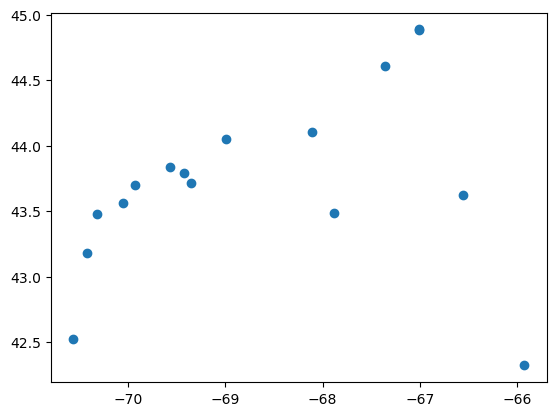

In [732]:
plt.scatter(X.loc[UoM]["minLongitude"],X.loc[UoM]["minLatitude"])

In [709]:
X.index

Index(['A01', 'B01', 'C02', 'C05', 'CINAR', 'D03', 'E01', 'E05', 'E07', 'F01',
       'I01', 'J02', 'J03', 'J04', 'L01', 'LOBO', 'M01', 'N01', 'ONSET',
       'UCONN', 'UNH', 'URI', 'WHOI'],
      dtype='object', name='BuoyID')

In [710]:
#k=5 neighbors in saved png.
from sklearn.neighbors import NearestNeighbors
import numpy as np
import networkx as nx
nbrs = NearestNeighbors(n_neighbors=8, algorithm='brute').fit(X)

In [712]:
distances, indices = nbrs.kneighbors(X)

In [725]:
make_df('CINAR_DSG_MD101_sbe37')

,station,mooring_site_desc,conductivity,temperature,salinity,sigma_t,offset_time,time_created,time_modified,longitude,latitude,depth
time,,,,,,,,,,,,
2014-04-25 14:10:00+00:00,MD101,Ocean City,33.4434,9.3789,30.817389,23.786991,-0.0,2014-04-25T14:16:25Z,2014-04-25T14:16:25Z,-75.004944,38.264168,0.9
2014-04-25 14:20:00+00:00,MD101,Ocean City,33.4640,9.3443,30.868261,23.832106,0.0,2014-04-25T14:47:12Z,2014-04-25T14:47:12Z,-75.004944,38.264168,0.9
2014-04-25 14:30:00+00:00,MD101,Ocean City,33.4839,9.3520,30.881964,23.841614,0.0,2014-04-25T14:47:12Z,2014-04-25T14:47:12Z,-75.004944,38.264168,0.9
2014-04-25 14:40:00+00:00,MD101,Ocean City,33.5271,9.4157,30.871151,23.823252,0.0,2014-04-25T14:47:12Z,2014-04-25T14:47:12Z,-75.004944,38.264168,0.9
2014-04-25 14:50:00+00:00,MD101,Ocean City,33.5962,9.4605,30.903030,23.841146,0.0,2014-04-25T15:16:15Z,2014-04-25T15:16:15Z,-75.004944,38.264168,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-04-26 07:40:00+00:00,MD101,Ocean City,33.7105,9.2980,31.160767,24.067831,-0.0,2014-04-26T07:47:19Z,2014-04-26T07:47:19Z,-75.004944,38.264168,0.9
2014-04-26 07:50:00+00:00,MD101,Ocean City,33.7042,9.2880,31.163027,24.071150,-0.0,2014-04-26T08:16:34Z,2014-04-26T08:16:34Z,-75.004944,38.264168,0.9
2014-04-26 08:00:00+00:00,MD101,Ocean City,33.6980,9.2732,31.169577,24.078566,-0.0,2014-04-26T08:16:34Z,2014-04-26T08:16:34Z,-75.004944,38.264168,0.9


In [730]:
UoM = list(filter(lambda x: len(x.split("0")[0]) == 1, list(X.index)))
UoM

['A01',
 'B01',
 'C02',
 'C05',
 'D03',
 'E01',
 'E05',
 'E07',
 'F01',
 'I01',
 'J02',
 'J03',
 'J04',
 'L01',
 'M01',
 'N01']

In [726]:

[meta_dict[i] for i in list(X.index[indices[0]])]

AttributeError: 'Index' object has no attribute 'split'

In [607]:
X.iloc[0]["minLongitude"]

-70.5664

In [29]:
labels = []
nans = []
fat_dict = {}
for buoy in meta_final:
    for data in meta_final[buoy]:
        try:
            df = make_df(data)
        except Exceptions:
            print(f"{buoy}, {data} failed")
            continue
        fat_dict[data]=df
        for col in df.columns:
            labels.append(f"{buoy}, {data}, {col}")
            nans.append(list(df.loc[df[col].isna()].index))

NameError: name 'meta_final' is not defined

In [651]:
len(np.arange(.5,len(labels)))

3028

In [646]:
*np.ones(len(nans[0]))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [690]:
len(meta)

228

In [685]:
nanny = list(pd.Series([len(nans[i]) for i in range(len(nans))]).sort_values().tail(100).index)

In [26]:
for i in nanny:
    nans[i]=[]
fig, ax = plt.subplots(1,1,figsize=(15, 15))
y = np.arange(.5,len(labels))
for i in range(len(nans)):
    height = y[i]*np.ones(len(nans[i]))
    ax.plot(nans[i], height, label = labels[i])

NameError: name 'nanny' is not defined

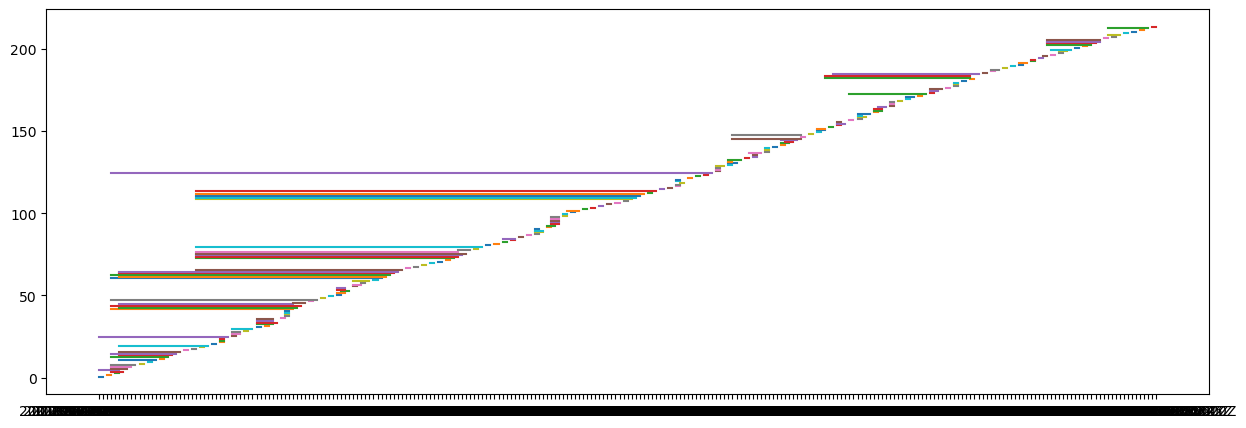

In [708]:
height = np.arange(.5, len(meta))
fig, ax = plt.subplots(1,1,figsize=(15, 5))
i = 0
for data in meta[['minTime','maxTime']].dropna().index[:228]:
    ax.plot([meta.loc[data]["minTime"],meta.loc[data]["maxTime"]],[height[i],height[i]],label=data)
    i +=1

In [737]:
UoM_bin = [int(i in UoM) for i in X.index]
col = ['blue','red']
c = [col[UoM_bin[i]] for i in range(len(X))]

In [610]:
edges = []
for i in range(len(indices)):
    for nbr in indices[i][1:]:
        edges.append([i,nbr])

In [738]:
G = nx.from_edgelist(edges)
labels = {i:X.index[i] for i in range(len(X))}
pos = {i:(X["minLongitude"][i],X["minLatitude"][i]) for i in range(len(X))}

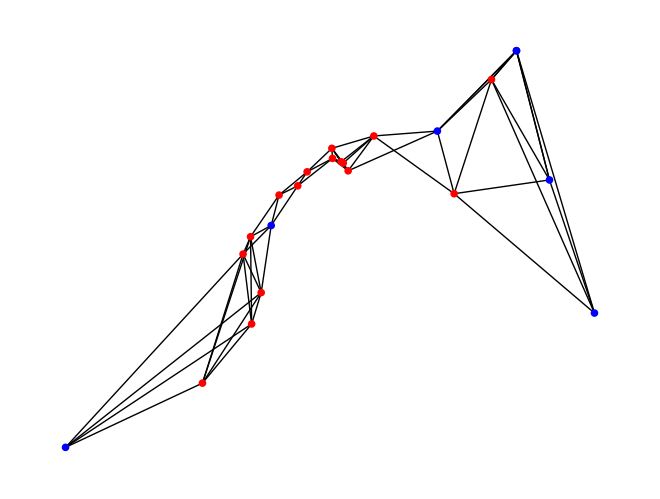

In [739]:
nx.draw(G, node_size=20,pos=pos,node_color=c)
plt.savefig("coastline.png")

In [745]:
subgraph_bin = [i for i in range(len(X.index)) if int(X.index[i] in UoM)]
UoM_graph = G.subgraph(subgraph_bin)

In [31]:
active_datasets = list(meta.index)
stations = set()
for i in range (len(active_datasets)):
    stations.add(active_datasets[i].split("_")[0])

In [152]:
meta_dict

{'keys': ['SHELL',
  'WW3',
  'nefsc',
  'J04',
  'UCONN',
  'UNH',
  'ACFFA',
  'LOBO',
  'M01',
  'D03',
  'GRBGBWQ',
  'GRBORWQ',
  'C02',
  'GREEN',
  'ONSET',
  'cwwcNDBCMet',
  'CINAR',
  'I01',
  'GRBGLMET',
  'F01',
  'J02',
  'J03',
  'E05',
  'C05',
  'WBTS',
  'allDatasets',
  'GREAT',
  'E01',
  'GRBSQWQ',
  'N01',
  'E07',
  'bob',
  'A01',
  'B01',
  'GRBLRWQ',
  'L01',
  'URI',
  'WHOI']}

In [32]:
meta_dict = {key: [] for key in list(stations)}
for i in range (len(active_datasets)):
    meta_dict[active_datasets[i].split("_")[0]].append(active_datasets[i])

NameError: name 'make_df' is not defined

In [180]:
buoy_df = make_df(meta_dict["SHELL"][0])

['station_name', 'time', 'air_pressure_1m', 'air_temperature_1m', 'relative_humidity_1m', 'latitude', 'longitude', 'wind_speed_004m', 'wind_from_direction_004m', 'sea_water_temperature_1m', 'sea_water_temperature_2m', 'sea_water_temperature_42m', 'sea_water_salinity_2m', 'sea_water_pressure', 'sea_surface_wave_significant_height', 'sea_surface_wave_dominant_period', 'sea_surface_wave_from_direction', 'direction_of_sea_water_velocity_3m', 'sea_water_velocity_3m', 'direction_of_sea_water_velocity_4m', 'sea_water_velocity_4m', 'direction_of_sea_water_velocity_5m', 'sea_water_velocity_5m', 'direction_of_sea_water_velocity_6m', 'sea_water_velocity_6m', 'direction_of_sea_water_velocity_7m', 'sea_water_velocity_7m', 'direction_of_sea_water_velocity_8m', 'sea_water_velocity_8m', 'direction_of_sea_water_velocity_9m', 'sea_water_velocity_9m', 'direction_of_sea_water_velocity_10m', 'sea_water_velocity_10m', 'direction_of_sea_water_velocity_11m', 'sea_water_velocity_11m', 'direction_of_sea_water_v

In [194]:
column_dict = {key: [] for key in list(stations)}
for buoy in meta_dict.keys():
    print(f"Buoy {buoy} has {len(meta_dict[buoy])} datasets")
    for data in meta_dict[buoy]:
        try:
            next_df = make_df(data)
        except Exception:
            print(f"{buoy} failed later")
            continue
        column_dict[buoy].append(next_df.columns)

Buoy SHELL has 2 datasets
['station_name', 'time', 'air_pressure_1m', 'air_temperature_1m', 'relative_humidity_1m', 'latitude', 'longitude', 'wind_speed_004m', 'wind_from_direction_004m', 'sea_water_temperature_1m', 'sea_water_temperature_2m', 'sea_water_temperature_42m', 'sea_water_salinity_2m', 'sea_water_pressure', 'sea_surface_wave_significant_height', 'sea_surface_wave_dominant_period', 'sea_surface_wave_from_direction', 'direction_of_sea_water_velocity_3m', 'sea_water_velocity_3m', 'direction_of_sea_water_velocity_4m', 'sea_water_velocity_4m', 'direction_of_sea_water_velocity_5m', 'sea_water_velocity_5m', 'direction_of_sea_water_velocity_6m', 'sea_water_velocity_6m', 'direction_of_sea_water_velocity_7m', 'sea_water_velocity_7m', 'direction_of_sea_water_velocity_8m', 'sea_water_velocity_8m', 'direction_of_sea_water_velocity_9m', 'sea_water_velocity_9m', 'direction_of_sea_water_velocity_10m', 'sea_water_velocity_10m', 'direction_of_sea_water_velocity_11m', 'sea_water_velocity_11m',

['station', 'time', 'latitude', 'longitude', 'depth', 'wind_speed', 'chlorophyll', 'sea_water_alkalinity_expressed_as_mole_equivalent', 'Ed_PAR', 'dissolved_oxygen', 'surface_partial_pressure_of_carbon_dioxide_in_sea_water', 'barometric_pressure', 'air_temperature', 'sea_water_salinity', 'wind_from_direction', 'sea_water_pH_reported_on_total_scale', 'sea_water_temperature', 'wind_gust']
['station', 'time', 'latitude', 'longitude', 'depth', 'wind_speed', 'chlorophyll', 'dissolved_oxygen', 'surface_partial_pressure_of_carbon_dioxide_in_sea_water', 'air_temperature', 'sea_water_salinity', 'wind_from_direction', 'sea_water_temperature', 'wind_gust', 'surface_partial_pressure_of_carbon_dioxide_in_air', 'turbidity']
['time', 'platform', 'depth', 'latitude', 'longitude', 'temperature', 'temperature_QARTOD_timing_test', 'temperature_QARTOD_syntax_test', 'temperature_QARTOD_location_test', 'temperature_QARTOD_gross_range_test', 'temperature_QARTOD_climatology_test', 'salinity', 'salinity_QARTOD

['station', 'mooring_site_desc', 'water_depth', 'time', 'chlorophyll', 'chlorophyll_qc', 'turbidity', 'turbidity_qc', 'QSE', 'QSE_qc', 'time_created', 'time_modified', 'longitude', 'latitude', 'depth']
Buoy GRBGBWQ has 1 datasets
['time', 'station', 'name', 'reserveName', 'latitude', 'longitude', 'chlorophyll_fluorescence_in_sea_water', 'depth', 'oxygen_concentration_in_sea_water', 'fractional_saturation_of_oxygen_in_sea_water', 'sea_water_acidity', 'sea_water_salinity', 'specific_conductance', 'sea_water_temperature', 'sea_water_turbidity']
Buoy GRBORWQ has 1 datasets
['time', 'station', 'name', 'reserveName', 'latitude', 'longitude', 'depth', 'oxygen_concentration_in_sea_water', 'fractional_saturation_of_oxygen_in_sea_water', 'sea_water_acidity', 'sea_water_salinity', 'specific_conductance', 'sea_water_temperature', 'sea_water_turbidity']
Buoy C02 has 5 datasets
['station', 'time', 'mooring_site_desc', 'current_speed', 'current_speed_qc', 'current_direction', 'current_direction_qc', 

['station', 'time', 'mooring_site_desc', 'air_temperature', 'air_temperature_qc', 'barometric_pressure', 'barometric_pressure_qc', 'wind_gust', 'wind_gust_qc', 'wind_gust_time', 'wind_gust_time_qc', 'wind_speed', 'wind_speed_qc', 'wind_direction', 'wind_direction_qc', 'wind_gust_1s', 'wind_gust_1s_qc', 'wind_min', 'wind_min_qc', 'wsrc', 'offset_time', 'time_created', 'time_modified', 'longitude', 'latitude', 'depth']
['station', 'time', 'mooring_site_desc', 'conductivity', 'conductivity_qc', 'temperature', 'temperature_qc', 'salinity', 'salinity_qc', 'sigma_t', 'sigma_t_qc', 'offset_time', 'time_created', 'time_modified', 'longitude', 'latitude', 'depth']
['station', 'time', 'mooring_site_desc', 'water_level', 'altitude_qc', 'altitude_min', 'altitude_min_qc', 'altitude_max', 'altitude_max_qc', 'offset_time', 'time_created', 'time_modified', 'longitude', 'latitude', 'depth']
['station', 'time', 'mooring_site_desc', 'index', 'significant_wave_height', 'significant_wave_height_qc', 'maxim

['station', 'time', 'mooring_site_desc', 'index', 'significant_wave_height', 'significant_wave_height_qc', 'maximum_wave_height', 'maximum_wave_height_qc', 'dominant_wave_period', 'dominant_wave_period_qc', 'mean_wave_direction', 'mean_wave_direction_qc', 'r1', 'r1_qc', 'principal_wave_direction', 'principal_wave_direction_qc', 'r2', 'r2_qc', 'offset_time', 'time_created', 'time_modified', 'longitude', 'latitude', 'depth']
['station', 'time', 'mooring_site_desc', 'air_temperature', 'air_temperature_qc', 'barometric_pressure', 'barometric_pressure_qc', 'wind_gust', 'wind_gust_qc', 'wind_gust_time', 'wind_gust_time_qc', 'wind_speed', 'wind_speed_qc', 'wind_direction', 'wind_direction_qc', 'wind_gust_1s', 'wind_gust_1s_qc', 'wind_min', 'wind_min_qc', 'wsrc', 'offset_time', 'time_created', 'time_modified', 'longitude', 'latitude', 'depth']
['station', 'time', 'mooring_site_desc', 'conductivity', 'conductivity_qc', 'temperature', 'temperature_qc', 'salinity', 'salinity_qc', 'sigma_t', 'sigm

['station', 'time', 'mooring_site_desc', 'air_temperature', 'air_temperature_qc', 'barometric_pressure', 'barometric_pressure_qc', 'wind_gust', 'wind_gust_qc', 'wind_speed', 'wind_speed_qc', 'wind_direction', 'wind_direction_qc', 'visibility', 'visibility_qc', 'longitude', 'latitude', 'depth']
['station', 'time', 'mooring_site_desc', 'conductivity', 'conductivity_qc', 'temperature', 'temperature_qc', 'salinity', 'salinity_qc', 'sigma_t', 'sigma_t_qc', 'longitude', 'latitude', 'depth']
Buoy J02 has 4 datasets
['station', 'time', 'mooring_site_desc', 'current_speed', 'current_speed_qc', 'current_direction', 'current_direction_qc', 'temperature', 'temperature_qc', 'longitude', 'latitude', 'depth']
['station', 'time', 'mooring_site_desc', 'significant_wave_height', 'significant_wave_height_qc', 'dominant_wave_period', 'dominant_wave_period_qc', 'longitude', 'latitude', 'depth']
['station', 'time', 'mooring_site_desc', 'air_temperature', 'air_temperature_qc', 'barometric_pressure', 'baromet

['station', 'time', 'mooring_site_desc', 'air_temperature', 'air_temperature_qc', 'barometric_pressure', 'barometric_pressure_qc', 'wind_gust', 'wind_gust_qc', 'wind_speed', 'wind_speed_qc', 'wind_direction', 'wind_direction_qc', 'visibility', 'visibility_qc', 'longitude', 'latitude', 'depth']
['station', 'time', 'mooring_site_desc', 'water_depth', 'solar_zenith_angle', 'solar_zenith_angle_qc', 'Ed_PAR', 'Ed_PAR_qc', 'chlorophyll', 'chlorophyll_qc', 'longitude', 'latitude', 'depth']
['station', 'time', 'mooring_site_desc', 'water_depth', 'transmissivity_voltage', 'transmissivity_voltage_qc', 'transmissivity', 'transmissivity_qc', 'attenuation', 'attenuation_qc', 'conductivity', 'conductivity_qc', 'temperature', 'temperature_qc', 'salinity', 'salinity_qc', 'sigma_t', 'sigma_t_qc', 'time_created', 'time_modified', 'longitude', 'latitude', 'depth']
['station', 'time', 'mooring_site_desc', 'conductivity', 'conductivity_qc', 'temperature', 'temperature_qc', 'salinity', 'salinity_qc', 'sigma

['station', 'time', 'mooring_site_desc', 'water_depth', 'transmissivity_voltage', 'transmissivity_voltage_qc', 'transmissivity', 'transmissivity_qc', 'attenuation', 'attenuation_qc', 'conductivity', 'conductivity_qc', 'temperature', 'temperature_qc', 'salinity', 'salinity_qc', 'sigma_t', 'sigma_t_qc', 'time_created', 'time_modified', 'longitude', 'latitude', 'depth']
['station', 'time', 'mooring_site_desc', 'dissolved_oxygen', 'dissolved_oxygen_qc', 'oxygen_saturation', 'oxygen_saturation_qc', 'percent_oxygen_saturation', 'percent_oxygen_saturation_qc', 'conductivity', 'conductivity_qc', 'temperature', 'temperature_qc', 'salinity', 'salinity_qc', 'sigma_t', 'sigma_t_qc', 'longitude', 'latitude', 'depth']
['station', 'time', 'mooring_site_desc', 'conductivity', 'conductivity_qc', 'temperature', 'temperature_qc', 'salinity', 'salinity_qc', 'sigma_t', 'sigma_t_qc', 'longitude', 'latitude', 'depth']
Buoy B01 has 8 datasets
['station', 'time', 'mooring_site_desc', 'current_speed', 'current_

['time', 'station', 'longitude', 'latitude', 'water_depth', 'Timestamp_Epoch_Seconds_', 'Datetime', 'Temperature', 'depth', 'Salinity', 'Chlorophyll']
['time', 'mooring_name', 'ESP_name', 'general_location', 'latitude', 'longitude', 'avg_spot_intensity', 'stddev_spot_intensity', 'min_spot_intensity', 'max_spot_intensity', 'avg_array_background', 'volume_ml', 'slope', 'y_intercept', 'ESPvalue_cells_Liter', 'comments']
['time', 'station', 'longitude', 'latitude', 'water_depth', 'Timestamp_Epoch_Seconds_', 'Datetime', 'Temperature', 'depth', 'Salinity', 'Chlorophyll']


In [252]:
has_label = set()
for buoy in buoy_metadata:
    for dset in buoy_metadata[buoy]:
        if any("phy" in s for s in buoy_metadata[buoy][dset]):
            has_label.add(buoy)
has_label = list(has_label)

In [463]:
meta_final['A01']

{'A01_aanderaa_hist': ['station',
  'mooring_site_desc',
  'current_speed',
  'current_direction',
  'temperature',
  'longitude',
  'latitude',
  'depth'],
 'A01_aanderaa_o2_all': ['station',
  'mooring_site_desc',
  'water_depth',
  'longitude',
  'latitude',
  'depth',
  'current_speed',
  'current_direction',
  'current_u',
  'current_v',
  'temperature',
  'dissolved_oxygen',
  'percent_oxygen_saturation',
  'time_created',
  'time_modified'],
 'A01_accelerometer_all': ['station',
  'mooring_site_desc',
  'significant_wave_height',
  'dominant_wave_period',
  'longitude',
  'latitude',
  'depth'],
 'A01_waves_mstrain_all': ['station',
  'mooring_site_desc',
  'water_depth',
  'index',
  'significant_wave_height_3',
  'maximum_wave_height_3',
  'dominant_wave_period_3',
  'mean_wave_direction_3',
  'mean_wave_direction_spread_3',
  'principal_wave_direction_3',
  'principal_wave_direction_spread_3',
  'swell_wave_height_3',
  'swell_wave_period_3',
  'wind_wave_height_3',
  'wind_w

In [9]:
df0 = make_df('A01_sbe16_trans_all').reindex()
df1 = make_df('A01_optics_s_all').reindex()

In [500]:
def bid(data_name):
    return data_name.split("_")[0]
meta["BuoyID"] = list(map(bid,list(meta.index)))

In [523]:

grouped = meta[['minTime', 'maxTime',"BuoyID"]].groupby(["BuoyID"])
for name,group in grouped:
    print(f"{name}\n min:\n {group['minTime'].max()}\n max:\n {group['maxTime'].min()}")

A01
 min:
 2022-09-09T16:00:00Z
 max:
 2012-10-22T18:00:00Z
ACFFA
 min:
 2019-05-22T18:20:00Z
 max:
 2020-01-02T09:00:00Z
B01
 min:
 2020-09-15T03:00:00Z
 max:
 2007-09-23T19:00:00Z
C02
 min:
 2002-03-26T18:00:03Z
 max:
 2008-04-16T23:00:00Z
C05
 min:
 2015-10-15T15:30:00Z
 max:
 2016-07-07T01:40:00Z
CINAR
 min:
 2016-09-04T12:50:00Z
 max:
 2014-04-26T08:20:00Z
D03
 min:
 2017-05-21T18:00:00Z
 max:
 2018-01-25T00:00:00Z
E01
 min:
 2021-06-15T21:00:00Z
 max:
 2006-09-12T10:00:00Z
E05
 min:
 2015-08-25T15:00:00Z
 max:
 2019-08-08T14:00:00Z
E07
 min:
 2019-05-16T16:00:00Z
 max:
 2021-06-17T00:40:00Z
F01
 min:
 2012-04-14T16:00:00Z
 max:
 2023-04-12T01:00:00Z
GRBGBWQ
 min:
 1995-07-24T16:30:00Z
 max:
 2022-12-08T16:30:00Z
GRBGLMET
 min:
 2005-10-13T19:00:00Z
 max:
 2023-03-01T12:45:00Z
GRBLRWQ
 min:
 2012-03-24T15:00:00Z
 max:
 2022-12-12T18:45:00Z
GRBORWQ
 min:
 2002-04-17T19:30:00Z
 max:
 2022-12-06T16:30:00Z
GRBSQWQ
 min:
 2012-03-20T17:30:00Z
 max:
 2022-12-08T16:00:00Z
GREAT
 min:
 20

/var/folders/g6/dvksyd2x2vzgtx4pt5g71bzh0000gn/T/ipykernel_9015/1559074403.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name,group in grouped:


TypeError: '>=' not supported between instances of 'str' and 'float'

In [518]:
df1

,station,mooring_site_desc,chlorophyll,turbidity,longitude,latitude,depth
time,,,,,,,
2005-10-22 12:00:00+00:00,A01,Massachusetts Bay,0.975000,0.5376,-70.5667,42.5236,3.0
2005-10-22 13:00:00+00:00,A01,Massachusetts Bay,0.950000,0.5504,-70.5667,42.5236,3.0
2005-10-22 14:00:00+00:00,A01,Massachusetts Bay,1.075000,0.5632,-70.5667,42.5236,3.0
2005-10-22 15:00:00+00:00,A01,Massachusetts Bay,0.850000,0.5696,-70.5667,42.5236,3.0
2005-10-22 16:00:00+00:00,A01,Massachusetts Bay,1.112500,0.5696,-70.5667,42.5236,3.0
...,...,...,...,...,...,...,...
2023-04-12 03:00:00+00:00,A01,Massachusetts Bay,15.718092,2.1725,-70.5655,42.5232,3.0
2023-04-12 04:00:00+00:00,A01,Massachusetts Bay,16.032938,1.8050,-70.5655,42.5232,3.0
2023-04-12 05:00:00+00:00,A01,Massachusetts Bay,15.936062,1.8725,-70.5655,42.5232,3.0


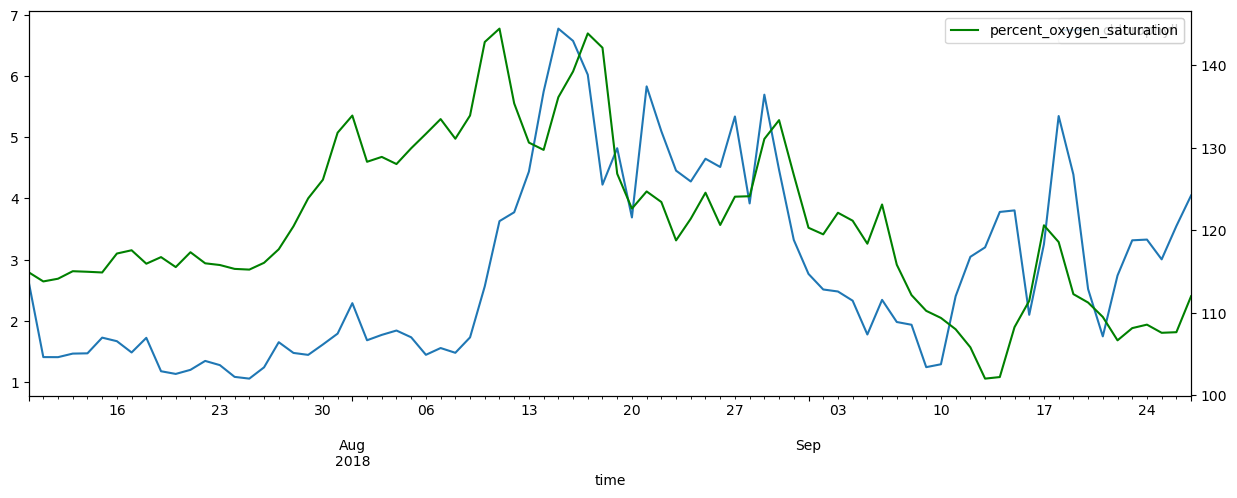

In [13]:
dr = ['2018-07-10','2018-09-27']
fig, ax = plt.subplots(1,1,figsize=(15, 5))
ax2 = ax.twinx()
df1[['chlorophyll']].loc[dr[0]:dr[1]].resample("D").mean().plot(style="-",ax=ax)
o2_check.loc[dr[0]:dr[1]].resample("D").mean().plot(style="-",ax=ax2,c='green')
plt.legend(loc = 'upper right')

In [460]:
df1.merge(df1, how='outer')

,station,mooring_site_desc,water_depth,current_speed,current_direction,current_u,current_v,temperature,conductivity,salinity,sigma_t,time_created,time_modified,longitude,latitude,depth,significant_wave_height,dominant_wave_period
0,D03,Eastern Casco Bay,33.0,22.8774,244.3324,-20.619905,-9.909333,18.021710,-999.0,-999.0,-999.0,2017-04-08T18:06:34Z,2017-04-08T18:06:34Z,-69.92200,43.69950,2.0,NaN,NaN
1,D03,Eastern Casco Bay,33.0,10.2655,216.5560,-6.114216,-8.246020,18.117895,-999.0,-999.0,-999.0,2017-04-08T18:06:34Z,2017-04-08T18:06:34Z,-69.92200,43.69950,2.0,NaN,NaN
2,D03,Eastern Casco Bay,33.0,10.8521,257.3416,-10.588327,-2.378106,18.246200,-999.0,-999.0,-999.0,2017-04-08T18:06:34Z,2017-04-08T18:06:34Z,-69.92200,43.69950,2.0,NaN,NaN
3,D03,Eastern Casco Bay,33.0,11.1454,180.3412,-0.066371,-11.145203,18.342476,-999.0,-999.0,-999.0,2017-04-08T18:06:34Z,2017-04-08T18:06:34Z,-69.92200,43.69950,2.0,NaN,NaN
4,D03,Eastern Casco Bay,33.0,18.1846,242.9260,-16.191921,-8.276555,18.406680,-999.0,-999.0,-999.0,2017-04-08T18:06:34Z,2017-04-08T18:06:34Z,-69.92200,43.69950,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33613,D03,Eastern Casco Bay,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-24T22:10:03Z,2018-01-24T22:10:03Z,-69.92671,43.70411,0.0,1.295687,10.666667
33614,D03,Eastern Casco Bay,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-24T22:48:03Z,2018-01-24T22:48:03Z,-69.92671,43.70411,0.0,1.195328,10.666667
33615,D03,Eastern Casco Bay,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-24T23:10:03Z,2018-01-24T23:10:03Z,-69.92671,43.70411,0.0,1.131611,10.666667
33616,D03,Eastern Casco Bay,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-24T23:48:03Z,2018-01-24T23:48:03Z,-69.92671,43.70411,0.0,0.994761,10.666667


In [200]:
meta_final = {key: {meta_dict[key][k]: list(column_dict[key][k]) for k in range(len(column_dict[key]))} for key in meta_dict.keys()}

In [531]:
has_label

['D03',
 'E01',
 'GRBGBWQ',
 'A01',
 'J04',
 'B01',
 'GRBLRWQ',
 'UNH',
 'URI',
 'E05',
 'ACFFA',
 'C05',
 'LOBO',
 'M01',
 'I01',
 'WHOI']

In [555]:
o2_check

time
2018-07-10 20:00:00+00:00    114.257520
2018-07-10 21:00:00+00:00    114.989940
2018-07-10 22:00:00+00:00    114.989940
2018-07-10 23:00:00+00:00    115.429390
2018-07-11 00:00:00+00:00    115.575874
                                ...    
2018-09-27 07:00:00+00:00    111.034874
2018-09-27 08:00:00+00:00    109.570030
2018-09-27 09:00:00+00:00    108.105194
2018-09-27 10:00:00+00:00    109.277060
2018-09-27 11:00:00+00:00    110.009480
Name: percent_oxygen_saturation, Length: 1888, dtype: float64

In [539]:
grouped.get_group(has_label[3])

,minTime,maxTime,BuoyID
datasetID,,,
A01_aanderaa_hist,2001-07-10T03:00:00Z,2012-10-22T18:00:00Z,A01
A01_aanderaa_o2_all,2018-07-10T20:00:00Z,2023-04-12T01:00:00Z,A01
A01_accelerometer_all,2022-09-09T16:00:00Z,2023-04-12T01:30:00Z,A01
A01_waves_mstrain_all,2021-11-02T20:00:00Z,2023-04-12T01:00:00Z,A01
A01_met_all,2001-07-10T03:00:00Z,2023-04-12T01:30:00Z,A01
A01_optics_s_all,2005-10-22T12:00:00Z,2023-04-12T01:00:00Z,A01
A01_optode_all,2008-10-01T15:00:00Z,2023-04-12T01:00:00Z,A01
A01_doppler_rt,2020-10-06T03:00:00Z,2023-04-12T01:00:00Z,A01
A01_sbe16_trans_all,2014-10-26T00:00:00Z,2017-01-30T14:00:00Z,A01


In [11]:
o2_check = make_df('A01_aanderaa_o2_all')['percent_oxygen_saturation'][:1888]

In [265]:
df_dict

{'SHELL': [],
 'WW3': [],
 'nefsc': [],
 'J04':                           station mooring_site_desc  water_depth  \
 time                                                               
 2018-07-20 14:40:00+00:00     NaN               NaN          NaN   
 2018-07-20 14:40:00+00:00     NaN               NaN          NaN   
 2018-07-20 14:40:00+00:00     NaN               NaN          NaN   
 2018-07-20 14:40:00+00:00     NaN               NaN          NaN   
 2018-07-20 14:40:00+00:00     NaN               NaN          NaN   
 ...                           ...               ...          ...   
 2019-04-05 14:10:00+00:00     NaN               NaN          NaN   
 2019-04-05 14:20:00+00:00     J04       Machias Bay         80.0   
 2019-04-05 14:20:00+00:00     J04       Machias Bay         80.0   
 2019-04-05 14:20:00+00:00     J04       Machias Bay         80.0   
 2019-04-05 14:20:00+00:00     J04       Machias Bay         80.0   
 
                            current_speed  current_dir

In [30]:
import pickle
with open('adj_mx.pkl', 'rb') as handle:
     adj_mx = pickle.load(handle)

UnicodeDecodeError: 'ascii' codec can't decode byte 0x80 in position 2: ordinal not in range(128)

In [ ]:
import pickle
with open('all_buoys.pickle', 'rb') as handle:
     pickle.load(handle, protocol=pickle.HIGHEST_PROTOCOL)

In [209]:
make_df("allDatasets")

['datasetID', 'accessible', 'institution', 'dataStructure', 'cdm_data_type', 'class', 'title', 'minLongitude', 'maxLongitude', 'longitudeSpacing', 'minLatitude', 'maxLatitude', 'latitudeSpacing', 'minAltitude', 'maxAltitude', 'minTime', 'maxTime', 'timeSpacing', 'griddap', 'subset', 'tabledap', 'MakeAGraph', 'sos', 'wcs', 'wms', 'files', 'fgdc', 'iso19115', 'metadata', 'sourceUrl', 'infoUrl', 'rss', 'email', 'testOutOfDate', 'outOfDate', 'summary']


KeyError: 'time'

In [207]:
buoy_metadata

{'SHELL': {'SHELL_MAYFLOWER_csv_all': ['station_name',
   'air_pressure_1m',
   'air_temperature_1m',
   'relative_humidity_1m',
   'latitude',
   'longitude',
   'wind_speed_004m',
   'wind_from_direction_004m',
   'sea_water_temperature_1m',
   'sea_water_temperature_2m',
   'sea_water_temperature_42m',
   'sea_water_salinity_2m',
   'sea_water_pressure',
   'sea_surface_wave_significant_height',
   'sea_surface_wave_dominant_period',
   'sea_surface_wave_from_direction',
   'direction_of_sea_water_velocity_3m',
   'sea_water_velocity_3m',
   'direction_of_sea_water_velocity_4m',
   'sea_water_velocity_4m',
   'direction_of_sea_water_velocity_5m',
   'sea_water_velocity_5m',
   'direction_of_sea_water_velocity_6m',
   'sea_water_velocity_6m',
   'direction_of_sea_water_velocity_7m',
   'sea_water_velocity_7m',
   'direction_of_sea_water_velocity_8m',
   'sea_water_velocity_8m',
   'direction_of_sea_water_velocity_9m',
   'sea_water_velocity_9m',
   'direction_of_sea_water_velocity_10

In [208]:
make_df('J04_aanderaa_all')

['station', 'mooring_site_desc', 'water_depth', 'time', 'current_speed', 'current_speed_qc', 'current_direction', 'current_direction_qc', 'current_u', 'current_u_qc', 'current_v', 'current_v_qc', 'temperature', 'temperature_qc', 'conductivity', 'conductivity_qc', 'salinity', 'salinity_qc', 'sigma_t', 'sigma_t_qc', 'time_created', 'time_modified', 'longitude', 'latitude', 'depth']


,station,mooring_site_desc,water_depth,current_speed,current_direction,current_u,current_v,temperature,conductivity,salinity,sigma_t,time_created,time_modified,longitude,latitude,depth
time,,,,,,,,,,,,,,,,
2018-07-20 15:00:00+00:00,J04,Machias Bay,80.0,19.3578,218.7204,-12.108701,-15.103106,12.113264,None,None,None,2018-08-07T03:30:15Z,2018-08-07T03:30:15Z,-67.3622,44.6063,2.0
2018-07-20 15:20:00+00:00,J04,Machias Bay,80.0,19.0645,215.9076,-11.180944,-15.441556,12.302279,None,None,None,2018-08-07T03:30:15Z,2018-08-07T03:30:15Z,-67.3622,44.6063,2.0
2018-07-20 15:40:00+00:00,J04,Machias Bay,80.0,15.5449,219.0720,-9.797895,-12.068354,12.365276,None,None,None,2018-08-07T03:30:15Z,2018-08-07T03:30:15Z,-67.3622,44.6063,2.0
2018-07-20 16:00:00+00:00,J04,Machias Bay,80.0,15.2516,222.9396,-10.389802,-11.165273,12.459765,None,None,None,2018-08-07T03:30:15Z,2018-08-07T03:30:15Z,-67.3622,44.6063,2.0
2018-07-20 16:20:00+00:00,J04,Machias Bay,80.0,13.7851,214.5012,-7.808205,-11.360498,12.617227,None,None,None,2018-08-07T03:30:15Z,2018-08-07T03:30:15Z,-67.3622,44.6063,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-05 13:00:00+00:00,J04,Machias Bay,80.0,13.1985,222.5880,-8.931712,-9.717248,2.940831,None,None,None,2019-04-05T13:10:03Z,2019-04-05T13:10:03Z,-67.3622,44.6063,2.0
2019-04-05 13:20:00+00:00,J04,Machias Bay,80.0,10.2655,256.3416,-9.975200,-2.424020,2.973855,None,None,None,2019-04-05T14:10:04Z,2019-04-05T14:10:04Z,-67.3622,44.6063,2.0
2019-04-05 13:40:00+00:00,J04,Machias Bay,80.0,18.4779,225.0492,-13.077064,-13.054624,2.973855,None,None,None,2019-04-05T14:10:04Z,2019-04-05T14:10:04Z,-67.3622,44.6063,2.0


In [247]:
from tqdm import tqdm

In [398]:
df_dict = {key: [] for key in list(stations)}
for buoy in list(has_label):
    print(buoy)
    if len(meta_dict[buoy]) == 1:
        df_dict[buoy] = make_df(meta_dict[buoy][0])
    else:
        try:
            buoy_df = make_df(meta_dict[buoy][0])
        except Exception:
            print(f"{buoy} failed early")
            continue
        for data in tqdm(meta_dict[buoy][1:]):
            try:
                next_df = make_df(data)
            except Exception:
                print(f"{buoy} failed later")
                
                continue
            next_df = make_df(data)
            buoy_df = buoy_df.join(next_df,rsuffix = '1',how='outer')
            df_dict[buoy] = buoy_df

D03


100%|█████████████████████████████████████████████| 4/4 [00:06<00:00,  1.61s/it]


E01


100%|█████████████████████████████████████████████| 8/8 [00:46<00:00,  5.84s/it]


GRBGBWQ
A01


100%|███████████████████████████████████████████| 10/10 [01:11<00:00,  7.17s/it]


J04


100%|█████████████████████████████████████████████| 6/6 [00:07<00:00,  1.30s/it]


B01


100%|█████████████████████████████████████████████| 7/7 [01:04<00:00,  9.28s/it]


GRBLRWQ
UNH


100%|█████████████████████████████████████████████| 3/3 [00:03<00:00,  1.10s/it]


URI


100%|███████████████████████████████████████████| 14/14 [00:23<00:00,  1.67s/it]


E05


100%|█████████████████████████████████████████████| 4/4 [00:09<00:00,  2.50s/it]


ACFFA
C05


100%|█████████████████████████████████████████████| 5/5 [00:08<00:00,  1.79s/it]


LOBO


100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  2.13it/s]


M01


100%|█████████████████████████████████████████████| 7/7 [00:50<00:00,  7.16s/it]


I01


100%|█████████████████████████████████████████████| 8/8 [00:56<00:00,  7.03s/it]


WHOI


100%|█████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


In [402]:
meta_dict

{'SHELL': ['SHELL_MAYFLOWER_csv_all', 'SHELL_MAYFLOWER_winds_csv_all'],
 'WW3': ['WW3_72_GulfOfMaine_latest',
  'WW3_EastCoast_latest',
  'WW3_GulfOfMaine_latest',
  'WW3_NorthAtlantic_latest'],
 'nefsc': ['nefsc_emolt_trawl_temp', 'nefsc_emolt_erddap'],
 'J04': ['J04_aanderaa_all',
  'J04_accelerometer_all',
  'J04_sbe16_pres_all',
  'J04_sbe37_pres_all',
  'J04_sbe37_all',
  'J04_met_all',
  'J04_optics_all'],
 'UCONN': ['UCONN_ARTG_WQ_BTM',
  'UCONN_ARTG_MET',
  'UCONN_ARTG_WQ_SFC',
  'UCONN_CLIS_MET',
  'UCONN_CLIS_WQ_SFC',
  'UCONN_EXRX_WQ_BTM',
  'UCONN_EXRX_MET',
  'UCONN_EXRX_WQ_MID',
  'UCONN_EXRX_WQ_SFC',
  'UCONN_WLIS_MET'],
 'UNH': ['UNH_CML', 'UNH_CML_realtime', 'UNH_CO2_realtime', 'UNH_GBB'],
 'ACFFA': ['ACFFA_CSV_all'],
 'LOBO': ['LOBO_CSV_66',
  'LOBO_CSV_65',
  'LOBO_CSV_64',
  'LOBO_CSV_67',
  'LOBO_CSV_70',
  'LOBO_CSV_72'],
 'M01': ['M01_aanderaa_all',
  'M01_accelerometer_all',
  'M01_waves_mstrain_all',
  'M01_met_all',
  'M01_optics_hist',
  'M01_sbe37_all',
  'M

In [403]:
for buoy in has_label:
    print(f"{buoy} has len {len(df_dict[buoy])}")

D03 has len 53539
E01 has len 826253
GRBGBWQ has len 408245
A01 has len 846932
J04 has len 37094
B01 has len 779148
GRBLRWQ has len 188566
UNH has len 125166
URI has len 179447
E05 has len 67513
ACFFA has len 16164
C05 has len 59962
LOBO has len 27982
M01 has len 748633
I01 has len 907230
WHOI has len 12316


In [409]:
df_dict["D03"]

,station,mooring_site_desc,water_depth,time,current_speed,current_direction,current_u,current_v,temperature,conductivity,...,water_depth1,time1,chlorophyll,turbidity,QSE,time_created1,time_modified1,longitude1,latitude1,depth1
0,D03,Eastern Casco Bay,33.0,2017-03-20 19:20:00+00:00,22.8774,244.3324,-20.619905,-9.909333,18.021710,-999.0,...,33.0,2017-05-21 18:00:00+00:00,3.066,0.7105,3.2208,2017-05-21T18:10:03Z,2017-05-21T18:10:03Z,-69.92671,43.70411,5.0
1,D03,Eastern Casco Bay,33.0,2017-03-20 19:40:00+00:00,10.2655,216.5560,-6.114216,-8.246020,18.117895,-999.0,...,33.0,2017-05-21 18:20:00+00:00,2.517,0.6755,3.5712,2017-05-21T19:10:04Z,2017-05-21T19:10:04Z,-69.92671,43.70411,5.0
2,D03,Eastern Casco Bay,33.0,2017-03-20 20:00:00+00:00,10.8521,257.3416,-10.588327,-2.378106,18.246200,-999.0,...,33.0,2017-05-21 18:40:00+00:00,3.230,0.6625,2.2272,2017-05-21T19:10:04Z,2017-05-21T19:10:04Z,-69.92671,43.70411,5.0
3,D03,Eastern Casco Bay,33.0,2017-03-20 20:20:00+00:00,11.1454,180.3412,-0.066371,-11.145203,18.342476,-999.0,...,33.0,2017-05-21 19:00:00+00:00,3.215,0.6325,2.9328,2017-05-21T19:10:04Z,2017-05-21T19:10:04Z,-69.92671,43.70411,5.0
4,D03,Eastern Casco Bay,33.0,2017-03-20 20:40:00+00:00,18.1846,242.9260,-16.191921,-8.276555,18.406680,-999.0,...,33.0,2017-05-21 19:20:00+00:00,3.251,0.6025,2.6304,2017-05-21T20:10:03Z,2017-05-21T20:10:03Z,-69.92671,43.70411,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53534,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53535,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53536,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53537,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [425]:
station_props = {key:None for key in has_label}
for buoy in has_label:
    nunique = df_dict[buoy].nunique()
    cols_to_drop = nunique[nunique <= 2].index
    station_props[buoy] = df_dict[buoy][cols_to_drop].loc[0]
    df_dict[buoy] = df_dict[buoy].drop(cols_to_drop,axis=1)

In [426]:
grouped = df_dict["D03"].groupby(['time'])


In [427]:
dup = []
for name, group in grouped:
    if group.shape[0] == 2:
        dup.append(name)

/var/folders/g6/dvksyd2x2vzgtx4pt5g71bzh0000gn/T/ipykernel_9015/483160293.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:


In [428]:
df_dict["D03"].nunique()

time                       21695
current_speed                233
current_direction           1025
current_u                  18543
current_v                  18544
temperature                  827
time_created               12250
time_modified              12250
time1                      11917
significant_wave_height    11910
dominant_wave_period          17
time_created1              11416
time_modified1             11416
time1                      17875
conductivity1              40795
temperature1               42380
pressure                    6008
salinity1                  52330
sigma_t1                   52633
time_created1              14344
time_modified1             14344
time1                      35749
air_temperature             8884
wind_gust                   4788
wind_min                    1020
wind_speed                  8092
wind_gust_1s                2097
wind_direction              7099
wind_percent_good            210
time_created1              11417
time_modif

In [437]:
df_dict["D03"].shape

(53539, 37)

In [443]:
len(df_dict["D03"].loc[df_dict["D03"][['time','time1']].nunique(axis=1)==1])

17791

In [442]:
df_dict["D03"].loc[df_dict["D03"][['time','time1']].nunique(axis=1)==1].dropna(how='all',axis=1).isna().sum()

time1                    0
conductivity1            0
temperature1             0
pressure                 0
salinity1                0
sigma_t1                 0
time_created1            0
time_modified1           0
time1                17790
air_temperature      17790
wind_gust            17790
wind_min             17790
wind_speed           17790
wind_gust_1s         17790
wind_direction       17790
wind_percent_good    17790
time_created1        17790
time_modified1       17790
dtype: int64

In [367]:
old = df_dict["D03"].loc[dup[i]]
old = pd.DataFrame(np.mean(old,axis=0)).transpose()
old["time"] = [dup[i]]
old.set_index(['time'])
# no_dups.append(old, ignore_index=False)

/Users/zoeshleifer/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,water_depth,current_speed,current_direction,current_u,current_v,temperature,conductivity,salinity,sigma_t,longitude,...,mooring_site_desc1,water_depth1,chlorophyll,turbidity,QSE,time_created1,time_modified1,longitude1,latitude1,depth1
time,,,,,,,,,,,,,,,,,,,,,
2017-03-21 00:20:00+00:00,33.0,23.7573,278.4508,-12.460355,-20.227428,17.989656,-999.0,-999.0,-999.0,-69.922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [377]:
old = df_dict["D03"].loc[dup[i]]
old = pd.DataFrame(np.mean(old,axis=0)).transpose()
old["time"] = [dup[i]]
old.set_index(['time'])

/Users/zoeshleifer/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,water_depth,current_speed,current_direction,current_u,current_v,temperature,conductivity,salinity,sigma_t,longitude,...,mooring_site_desc1,water_depth1,chlorophyll,turbidity,QSE,time_created1,time_modified1,longitude1,latitude1,depth1
time,,,,,,,,,,,,,,,,,,,,,
2017-03-21 00:20:00+00:00,33.0,23.7573,278.4508,-12.460355,-20.227428,17.989656,-999.0,-999.0,-999.0,-69.922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


AttributeError: 'list' object has no attribute 'is_unique'

In [389]:
olds = []
no_dups = df_dict["D03"][~df_dict["D03"].index.duplicated(keep=False)].reset_index()
cols = list(df_dict["D03"].columns)
for i in range(len(dup)):
    old = df_dict["D03"].loc[dup[i]]
    old = pd.DataFrame(np.mean(old,axis=0)).transpose()
    old["time"] = [dup[i]]
    old.set_index(['time'])
    olds.append(old)
pd.concat(olds)

/Users/zoeshleifer/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/zoeshleifer/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/zoeshleifer/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [302]:
max()

,station,mooring_site_desc,water_depth,current_speed,current_direction,current_u,current_v,temperature,conductivity,salinity,...,mooring_site_desc1,water_depth1,chlorophyll,turbidity,QSE,time_created1,time_modified1,longitude1,latitude1,depth1
time,,,,,,,,,,,,,,,,,,,,,
2017-03-21 00:20:00+00:00,D03,Eastern Casco Bay,33.0,23.7573,211.6336,-12.460355,-20.227428,17.989656,-999.0,-999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-21 00:20:00+00:00,D03,Eastern Casco Bay,33.0,NaN,345.2680,NaN,NaN,NaN,-999.0,-999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
buoy_props = {key:{} for key in has_label}
for buoy in has_label:
    for col in df_dict[buoy].columns:
        if (df_dict[buoy][[col]] == df_dict[buoy][[col]].iloc[0]).all()[0]:
            buoy_props[buoy][col] = df_dict[buoy][[col]].iloc[0]

IndexError: single positional indexer is out-of-bounds

In [222]:
df_dict["J04"]

,station,mooring_site_desc,water_depth,current_speed,current_direction,current_u,current_v,temperature,conductivity,salinity,...,mooring_site_desc1,water_depth1,chlorophyll,turbidity,QSE,time_created1,time_modified1,longitude1,latitude1,depth1
time,,,,,,,,,,,,,,,,,,,,,
2018-07-20 15:00:00+00:00,J04,Machias Bay,80.0,19.3578,218.7204,-12.108701,-15.103106,12.113264,None,None,...,Machias Bay,24.0,0.928,0.8905,-0.8016,2018-07-20T15:16:10Z,2018-07-20T15:16:10Z,-67.36035,44.606625,5.0
2018-07-20 15:00:00+00:00,J04,Machias Bay,80.0,19.3578,218.7204,-12.108701,-15.103106,12.113264,None,None,...,Machias Bay,24.0,0.928,0.8905,-0.8016,2018-07-20T15:16:10Z,2018-07-20T15:16:10Z,-67.36035,44.606625,5.0
2018-07-20 15:00:00+00:00,J04,Machias Bay,80.0,19.3578,218.7204,-12.108701,-15.103106,12.113264,None,None,...,Machias Bay,24.0,0.928,0.8905,-0.8016,2018-07-20T15:16:10Z,2018-07-20T15:16:10Z,-67.36035,44.606625,5.0
2018-07-20 15:00:00+00:00,J04,Machias Bay,80.0,19.3578,218.7204,-12.108701,-15.103106,12.113264,None,None,...,Machias Bay,24.0,0.928,0.8905,-0.8016,2018-07-20T15:16:10Z,2018-07-20T15:16:10Z,-67.36035,44.606625,5.0
2018-07-20 15:00:00+00:00,J04,Machias Bay,80.0,19.3578,218.7204,-12.108701,-15.103106,12.113264,None,None,...,Machias Bay,24.0,0.928,0.8905,-0.8016,2018-07-20T15:16:10Z,2018-07-20T15:16:10Z,-67.36035,44.606625,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-05 13:00:00+00:00,J04,Machias Bay,80.0,13.1985,222.5880,-8.931712,-9.717248,2.940831,None,None,...,Machias Bay,24.0,0.383,3.1215,1.5168,2019-04-05T13:10:03Z,2019-04-05T13:10:03Z,-67.36035,44.606625,5.0
2019-04-05 14:00:00+00:00,J04,Machias Bay,80.0,23.1707,205.7112,-10.052265,-20.876621,3.006871,None,None,...,Machias Bay,24.0,0.369,3.4140,1.6224,2019-04-05T14:10:04Z,2019-04-05T14:10:04Z,-67.36035,44.606625,5.0
2019-04-05 14:00:00+00:00,J04,Machias Bay,80.0,23.1707,205.7112,-10.052265,-20.876621,3.006871,None,None,...,Machias Bay,24.0,0.369,3.4140,1.6224,2019-04-05T14:10:04Z,2019-04-05T14:10:04Z,-67.36035,44.606625,5.0


In [173]:
try:
    print(ur)
except Exception:
    print("print this")

print this


In [163]:
df_dict['SHELL']

,station_name,air_pressure_1m,air_temperature_1m,relative_humidity_1m,latitude,longitude,wind_speed_004m,wind_from_direction_004m,sea_water_temperature_1m,sea_water_temperature_2m,...,wind_from_direction_140m,wind_speed_140m,wind_from_direction_160m,wind_speed_160m,wind_from_direction_180m,wind_speed_180m,wind_from_direction_200m,wind_speed_200m,wind_from_direction_250m,wind_speed_250m
time,,,,,,,,,,,,,,,,,,,,,
2020-04-13 00:00:00+00:00,Mayflower Wind,1023.33984,8.90137,84.64844,40.84136,-70.24905,NaN,NaN,6.74658,6.69531,...,182.11,23.82,184.01,24.88,185.39,25.75,187.73,26.60,189.92,28.00
2020-04-14 00:00:00+00:00,Mayflower Wind,1003.22266,11.96289,91.63086,40.84175,-70.24892,NaN,NaN,6.78760,6.71582,...,274.34,13.13,277.11,14.21,280.12,15.22,281.73,16.23,288.48,19.26
2020-04-14 00:00:00+00:00,Mayflower Wind,1003.22266,11.96289,91.63086,40.84175,-70.24892,NaN,NaN,6.78760,6.71582,...,274.34,13.13,277.11,14.21,280.12,15.22,281.73,16.23,288.48,19.26
2020-04-14 00:00:00+00:00,Mayflower Wind,1003.22266,11.96289,91.63086,40.84175,-70.24892,NaN,NaN,6.78760,6.71582,...,274.34,13.13,277.11,14.21,280.12,15.22,281.73,16.23,288.48,19.26
2020-04-14 00:00:00+00:00,Mayflower Wind,1003.22266,11.96289,91.63086,40.84175,-70.24892,NaN,NaN,6.78760,6.71582,...,274.34,13.13,277.11,14.21,280.12,15.22,281.73,16.23,288.48,19.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-06 00:00:00+00:00,Mayflower Wind,1008.78906,2.13379,38.24219,40.80272,-70.33984,NaN,NaN,4.27539,4.29590,...,297.68,12.64,297.13,12.71,296.86,12.76,296.74,12.81,295.90,12.95
2021-03-07 00:00:00+00:00,Mayflower Wind,1019.23828,0.30762,59.29688,40.80286,-70.33970,NaN,NaN,4.17285,4.18311,...,308.56,8.68,308.40,8.70,308.18,8.76,308.24,8.80,307.50,8.80
2021-03-08 00:00:00+00:00,Mayflower Wind,1026.46484,-0.49805,52.20703,40.80293,-70.33991,NaN,NaN,4.23438,4.17285,...,322.01,4.75,321.90,4.75,322.09,4.78,322.01,4.77,322.36,4.78


In [48]:
active_datasets = list(meta[meta['maxTime'].str.contains('2022')].index)
active_datasets

['A01_sbe16_disox_all']

In [13]:
sal_df.join(sal_temp.loc[sal_df.index]['salinity'])



NameError: name 'sal_df' is not defined

In [19]:
yuk = np.load('yuk.npz')

In [26]:
pd.DataFrame(yuk['x_offsets'])

,0
0,-11
1,-10
2,-9
3,-8
4,-7
5,-6
6,-5
7,-4
8,-3
9,-2


['x', 'y', 'x_offsets', 'y_offsets']

In [34]:
sal_df

,station,mooring_site_desc,dissolved_oxygen,oxygen_saturation,percent_oxygen_saturation,conductivity,temperature,salinity,sigma_t,longitude,latitude,depth
time,,,,,,,,,,,,
2014-06-04 01:00:00+00:00,A01,Massachusetts Bay,6.310979,7.221090,87.396484,30.9400,5.0340,32.039690,25.325370,-70.56550,42.523200,50.0
2014-06-04 02:00:00+00:00,A01,Massachusetts Bay,6.291374,7.231754,86.996506,30.8940,4.9710,32.047530,25.338450,-70.56550,42.523200,50.0
2014-06-04 03:00:00+00:00,A01,Massachusetts Bay,6.265983,7.228348,86.686240,30.9350,4.9800,32.085915,25.367880,-70.56550,42.523200,50.0
2014-06-04 04:00:00+00:00,A01,Massachusetts Bay,6.249856,7.219080,86.574135,30.9840,5.0310,32.092990,25.367920,-70.56550,42.523200,50.0
2014-06-04 05:00:00+00:00,A01,Massachusetts Bay,6.296538,7.209544,87.336150,31.0360,5.0830,32.102493,25.369740,-70.56550,42.523200,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-09 06:00:00+00:00,A01,Massachusetts Bay,5.068582,6.352634,79.787100,35.9237,10.5244,32.301710,24.757874,-70.56592,42.523537,50.0
2022-09-09 07:00:00+00:00,A01,Massachusetts Bay,5.051391,6.333774,79.753260,36.0493,10.6585,32.308346,24.740040,-70.56592,42.523537,50.0
2022-09-09 08:00:00+00:00,A01,Massachusetts Bay,5.045308,6.326444,79.749520,36.1007,10.7099,32.314087,24.735643,-70.56592,42.523537,50.0


In [4]:
df = make_df('A01_optics_s_all')
print(1)
sal_temp = make_df('A01_sbe37_all')[['salinity','temperature','depth']]
print(1)
sal_df = make_df('A01_sbe16_disox_all')
print(1)

1
1
1


In [7]:
sal_df.columns

Index(['station', 'mooring_site_desc', 'dissolved_oxygen', 'oxygen_saturation',
       'percent_oxygen_saturation', 'conductivity', 'temperature', 'salinity',
       'sigma_t', 'longitude', 'latitude', 'depth'],
      dtype='object')

In [ ]:
x = 0
dups = []
notna = []
col = ['turbidity','chlorophyll']
new_col = []
new_df = pd.DataFrame(columns = df.columns, index = list(set([i for i in sal_df.index if i in df.index])))
new_df = new_df.loc[new_df.index.sort_values()]
for i in new_df.index:
    if df[col].loc[i].index.name == 'time':
        val = df[col].loc[i].values[0]
    else:
        val = df[col].loc[i].values
    if not np.isnan(val).any():
        notna.append(i)
    new_col.append(val)

[0.5487049 3.315561 ]
[0.5369048 3.1605704]
[0.6313057 3.3465593]
[0.6903062 3.3464043]
[0.76110685 3.315406  ]
[0.68440616 3.1604154 ]
[0.6313057 3.2224116]
[0.6018054 3.1914134]
[0.5782052 3.1294172]
[0.50150454 3.067421  ]
[0.48380435 2.6644452 ]
[0.4661042 2.9124303]
[0.49560446 2.9434283 ]
[0.50150454 2.9744265 ]
[0.48380435 2.41646   ]
[0.44840404 3.067576  ]
[0.4661042 2.3854618]
[0.5428049 3.2534099]
[0.554605  3.0984192]
[0.5487049 3.8733726]
[0.50740457 3.718382  ]
[0.48380435 3.3774023 ]
[0.47200423 3.3464043 ]
[0.442504  3.2844079]
[0.43070388 3.2844079 ]
[0.43070388 3.0984192 ]
[0.42480382 3.067421  ]
[0.44840404 3.0054247 ]
[0.43660393 2.8194358 ]
[0.50150454 2.5404525 ]
[0.5133046 2.4474583]
[0.4779043 2.633447 ]
[0.43660393 2.7264414 ]
[0.4130037 2.9434283]
[0.4012036 2.881432 ]
[0.3894035 2.9124303]
[0.38350344 3.0984192 ]
[0.39530355 3.1605704 ]
[0.38350344 2.6646001 ]
[0.39530355 2.4476132 ]
[0.3894035 2.230626 ]
[0.38350344 2.16863   ]
[0.38350344 2.199628  ]
[0.377

[0.2891026 3.7492251]
[0.2773025 3.6562307]
[0.27140245 3.718227  ]
[0.27140245 4.0592065 ]
[0.2773025 4.462182 ]
[0.28320256 4.5551767 ]
[0.2773025 4.617173 ]
[0.2773025 3.6252325]
[0.2773025 3.1912584]
[0.2773025 3.1292622]
[0.2773025 3.1292622]
[0.2655024 3.8732176]
[0.27140245 4.5551767 ]
[0.29500267 4.865158  ]
[0.32450292 4.617173  ]
[0.4012036 5.237136 ]
[0.34810314 5.237136  ]
[0.31860286 5.423125  ]
[0.3127028 5.485121 ]
[0.3009027 5.8570986]
[0.27140245 5.144141  ]
[0.2773025 5.2061377]
[0.2891026 5.3611283]
[0.30680275 5.423125  ]
[0.2891026 5.1751394]
[0.29500267 4.8031616 ]
[0.2891026 4.5241785]
[0.29500267 4.2761936 ]
[0.2891026 4.0592065]
[0.29500267 3.9972103 ]
[0.29500267 3.8112214 ]
[0.29500267 3.7492251 ]
[0.30680275 3.966212  ]
[0.29500267 3.0982642 ]
[0.29500267 2.416305  ]
[0.30680275 2.9432733 ]
[0.3127028 2.9122753]
[0.3127028 4.2761936]
[0.3127028 4.3071914]
[0.30680275 4.3381896 ]
[0.31860286 4.2761936 ]
[0.31860286 4.2451954 ]
[0.3127028 4.369188 ]
[0.3127028

[0.25370228 2.850124  ]
[0.25370228 2.850124  ]
[0.25370228 2.7571297 ]
[0.25370228 2.7881277 ]
[0.5133046 2.6951332]
[0.25370228 2.5711408 ]
[0.24780223 2.633137  ]
[0.25370228 2.4781463 ]
[0.24780223 2.3851519 ]
[0.24780223 2.2921574 ]
[0.24190217 2.3231556 ]
[0.24190217 2.3231556 ]
[0.24190217 2.3541536 ]
[0.23600212 2.3541536 ]
[0.23600212 2.3851519 ]
[0.23600212 2.3231556 ]
[0.23600212 2.3541536 ]
[0.24190217 2.2921574 ]
[0.23600212 2.2301612 ]
[0.24190217 2.2301612 ]
[0.24190217 2.199163  ]
[0.23600212 2.2611594 ]
[0.24190217 2.3539987 ]
[0.24190217 2.6019838 ]
[0.24780223 2.6639802 ]
[0.24780223 2.7569747 ]
[0.24190217 2.8809671 ]
[0.24780223 3.0049596 ]
[0.24780223 2.7879727 ]
[0.24780223 2.7569747 ]
[0.24190217 2.6639802 ]
[0.24780223 2.4159951 ]
[0.24190217 2.2610044 ]
[0.24780223 1.9820211 ]
[0.24190217 2.1370118 ]
[0.23600212 2.0131743 ]
[0.24780223 2.0130193 ]
[0.24780223 2.0130193 ]
[0.24780223 1.951023  ]
[0.24190217 2.0441723 ]
[0.24780223 2.0131743 ]
[0.24190217 1.8581

[0.3894035 1.5477371]
[0.4012036 1.6407316]
[0.42480382 1.7957222 ]
[0.46020415 1.981556  ]
[0.49560446 2.0745506 ]
[0.5133046 2.1055486]
[0.49560446 2.0745506 ]
[0.50150454 2.1055486 ]
[0.442504  1.7957222]
[0.40710366 1.6097335 ]
[0.39530355 1.5787352 ]
[0.39530355 1.7027278 ]
[0.41890377 2.3226907 ]
[0.442504 2.384532]
[0.42480382 1.6407316 ]
[0.4543041 2.1367018]
[0.4661042 2.6945133]
[0.4661042 2.6015189]
[0.47200423 2.7255116 ]
[0.47200423 2.5085244 ]
[0.46020415 2.5395226 ]
[0.44840404 2.41553   ]
[0.44840404 2.41553   ]
[0.43070388 2.3225358 ]
[0.42480382 2.3536887 ]
[0.44840404 2.4465282 ]
[0.44840404 2.3225358 ]
[0.43660393 2.1365469 ]
[0.43070388 2.1055486 ]
[0.41890377 1.981556  ]
[0.40710366 2.0125542 ]
[0.4130037 2.1055486]
[0.40710366 2.1365469 ]
[0.4130037 2.1365469]
[0.41890377 2.1365469 ]
[0.4130037 2.2605393]
[0.46020415 2.41553   ]
[0.47200423 2.7255116 ]
[0.43070388 2.2915375 ]
[0.4012036 1.8267204]
[0.3894035 1.8887167]
[0.37170336 1.7027278 ]
[0.3658033 1.5787352

[0.3894035 1.5787352]
[0.38350344 1.6407316 ]
[0.38350344 1.6407316 ]
[0.3894035 1.7027278]
[0.38350344 1.733726  ]
[0.38350344 1.7647241 ]
[0.38350344 1.6097335 ]
[0.38350344 1.8267204 ]
[0.39530355 1.6717297 ]
[0.39530355 1.5787352 ]
[0.39530355 1.5787352 ]
[0.3894035 1.6097335]
[0.39530355 1.6097335 ]
[0.39530355 1.5787352 ]
[0.39530355 1.5787352 ]
[0.3894035 1.6097335]
[0.3894035 1.6407316]
[0.3894035 1.6407316]
[0.38350344 1.7027278 ]
[0.3894035 1.6407316]
[0.3894035 1.6097335]
[0.39530355 1.6407316 ]
[0.3894035 1.6407316]
[0.3894035 1.6715747]
[0.3894035 1.7335709]
[0.3894035 1.5785803]
[0.39530355 1.2685989 ]
[0.3894035 1.1446064]
[0.39530355 1.2066026 ]
[0.39530355 1.299597  ]
[0.40710366 1.6095784 ]
[0.39530355 1.7955673 ]
[0.3894035 1.7645692]
[0.39530355 1.7025728 ]
[0.3894035 1.7025728]
[0.3776034 1.7025728]
[0.38350344 1.7645692 ]
[0.37170336 1.7645692 ]
[0.38350344 1.7335709 ]
[0.3894035 1.7335709]
[0.38350344 1.6715747 ]
[0.3894035 1.6715747]
[0.38350344 1.6715747 ]
[0.3

[4.897044  3.2213268]
[5.1507463 3.283323 ]
[4.7141423 3.314321 ]
[4.4722404 3.6553006]
[4.348339  3.8722878]
[4.1713376 3.8722878]
[3.894035  3.6243026]
[3.663933  3.5933044]
[3.575432  3.5933044]
[3.457431  3.6862988]
[3.4987314 3.8102913]
[3.551832  3.8722878]
[3.5459318 3.934284 ]
[3.3807304 3.6243026]
[3.2922297 3.5623062]
[3.3630302 3.469312 ]
[3.32763 3.50031]
[3.1447282 3.469312 ]
[3.1506283 3.5623062]
[3.0149271 3.5623062]
[2.9264264 3.4073155]
[2.891026 3.469312]
[2.773025  3.3763175]
[2.6963243 3.469312 ]
[2.6550238 3.4383137]
[2.6019235 3.4073155]
[2.5134227 3.3763175]
[2.5193226 3.6243026]
[2.5370228 3.5931494]
[2.6373236 3.5621512]
[2.5783231 3.5931494]
[2.023718  3.2523248]
[2.0060182 3.1903286]
[2.011918  3.3453193]
[2.023718  3.4383137]
[1.8703169 3.7792933]
[1.8644168 3.6862988]
[1.7936162 3.5313082]
[1.781816  3.5313082]
[1.7936162 3.3763175]
[1.781816  3.3453193]
[1.770016 3.469312]
[1.8113163 3.1593304]
[1.9588176 3.2213268]
[1.9116172 3.3763175]
[1.9234173 3.22132

[1.1977108 1.051147 ]
[1.1859107 1.0821451]
[1.1505103 1.051147 ]
[1.1564105 1.0821451]
[1.10921   1.0821451]
[1.11511   1.1131432]
[1.0856098 1.051147 ]
[1.0974098 1.0821451]
[1.0738096 1.0821451]
[1.0620096 1.1131432]
[1.0266092  0.92715436]
[1.0089091  0.95815253]
[0.9853089 0.8651581]
[0.9558086  0.95815253]
[0.9086082 0.8031618]
[0.890908  1.0201488]
[0.87320787 0.8031618 ]
[0.84960765 1.1441413 ]
[0.84960765 1.1751395 ]
[0.86140776 1.1441413 ]
[0.83780754 1.1131432 ]
[0.8260074 1.1131432]
[0.8024072 1.1131432]
[0.8260074 1.0821451]
[0.8319075 1.1131432]
[0.86140776 1.0821451 ]
[0.9204083 1.0201488]
[0.9853089  0.95815253]
[0.9558086  0.98915064]
[0.9558086  0.98915064]
[0.9204083  0.98915064]
[0.92630833 1.0201488 ]
[0.9086082 1.0201488]
[0.8142073 1.0821451]
[0.7906071  0.92715436]
[0.7965072 0.7101674]
[0.77290696 0.6481711 ]
[0.7434067  0.61717296]
[0.7198065  0.52417856]
[0.8319075  0.58617485]
[0.8201074 0.7721637]
[0.8201074 1.0821451]
[0.78470707 1.0821451 ]
[0.7906071 1.0

[0.29500267 2.3219156 ]
[0.30680275 2.3219156 ]
[0.3009027 1.8259455]
[0.30680275 1.3609734 ]
[0.29500267 0.8650031 ]
[0.3009027 0.8650031]
[0.29500267 0.8960012 ]
[0.3009027 0.8030068]
[0.29500267 0.9269994 ]
[0.3009027 1.2059827]
[0.3009027 1.7639492]
[0.3009027 2.631897 ]
[0.3009027 2.4769063]
[0.3009027 2.5079045]
[0.29500267 2.600899  ]
[0.29500267 2.5389028 ]
[0.2891026 2.7248914]
[0.29500267 2.5699008 ]
[0.2891026 2.3839118]
[0.28320256 2.135927  ]
[0.2891026 2.166925 ]
[0.28320256 2.166925  ]
[0.29500267 2.3219156 ]
[0.29500267 2.3219156 ]
[0.2891026 2.6938934]
[0.29500267 2.6938934 ]
[0.30680275 2.1049287 ]
[0.2891026 1.5469621]
[0.2891026 1.0199938]
[0.2891026  0.83400494]
[0.3009027  0.89615625]
[0.2773025  0.89615625]
[0.2891026 1.6401116]
[0.29500267 2.3530688 ]
[0.29500267 2.7248914 ]
[0.29500267 2.9108803 ]
[0.3009027 2.631897 ]
[0.2891026 2.6628952]
[0.2891026 2.7558897]
[0.2891026 2.786888 ]
[0.2891026 2.8178859]
[0.28320256 2.8178859 ]
[0.2773025 2.6628952]
[0.2832025

[0.2006018 1.5471171]
[0.19470175 1.516119  ]
[0.1770016 1.1751395]
[0.1770016 1.1751395]
[0.1770016 1.0821451]
[0.17110154 1.051147  ]
[0.1770016 1.0819901]
[0.1888017 1.2681339]
[0.19470175 1.3611283 ]
[0.2006018 1.4851209]
[0.2006018 1.2061377]
[0.2006018 1.0201488]
[0.19470175 0.6481711 ]
[0.1888017 0.5551767]
[0.18290165 0.46218228]
[0.1888017  0.52417856]
[0.19470175 0.61717296]
[0.1888017  0.52417856]
[0.1888017  0.43118414]
[0.1770016  0.43118414]
[0.18290165 0.6481711 ]
[0.1770016  0.98915064]
[0.18290165 1.1131432 ]
[0.1770016 1.1441413]
[0.18290165 1.1751395 ]
[0.18290165 1.2061377 ]
[0.1888017 1.2681339]
[0.2006018 1.3301302]
[0.20650186 1.4231247 ]
[0.20650186 1.2061377 ]
[0.22420202 1.2991321 ]
[0.22420202 1.3921264 ]
[0.22420202 1.4851209 ]
[0.23010208 1.5471171 ]
[0.22420202 1.6091135 ]
[0.22420202 1.6091135 ]
[0.23010208 1.6401116 ]
[0.22420202 1.7021079 ]
[1.0856098 1.7021079]
[0.21830197 1.4541228 ]
[0.20650186 1.3611283 ]
[0.1888017 1.3611283]
[0.1770016 1.2061377]


[0.4779043 2.66336  ]
[0.27140245 2.601364  ]
[0.6018054 2.5703657]
[0.15340137 0.77247363]
[0.15340137 1.1754495 ]
[0.40710366 2.2913826 ]
[0.15930143 0.92761934]
[0.18290165 1.6095784 ]
[0.23600212 2.0125542 ]
[0.4543041 3.717452 ]
[0.1888017 1.6715747]
[0.31860286 3.283478  ]
[0.21830197 2.384532  ]
[0.31860286 2.6945133 ]
[0.39530355 3.6864538 ]
[1.7936162 7.7782083]
[0.68440616 5.236361  ]
[0.34810314 2.6945133 ]
[0.19470175 1.6715747 ]
[0.1770016 1.8264104]
[0.1770016 1.7645692]
[0.3776034 1.7645692]
[0.2773025 1.1446064]
[0.17110154 0.8347799 ]
[0.1770016 1.1136082]
[0.1770016 1.08261  ]
[0.34220308 1.5475821 ]
[0.554605  6.1043086]
[1.1210101 6.5072846]
[0.6903062 4.08943  ]
[0.15340137 0.92761934]
[0.1888017 1.3615932]
[1.6933153 8.677155 ]
[0.4012036 2.663515 ]
[0.40710366 3.2524798 ]
[0.16520149 1.7025728 ]
[0.29500267 2.849504  ]
[0.4661042 3.2214818]
[0.9322084 7.74721  ]
[0.40710366 2.198543  ]
[0.49560446 4.864383  ]
[0.57230514 3.8724427 ]
[0.7552068 4.926379 ]
[0.80830

[2.8615258 8.584625 ]
[0.33630303 5.019839  ]
[0.37170336 3.4077806 ]
[0.2891026 3.6869187]
[0.48380435 3.2529447 ]
[0.31860286 3.1599505 ]
[0.25960234 3.5009298 ]
[0.48380435 3.5630813 ]
[0.25370228 3.9040608 ]
[0.34220308 4.462027  ]
[0.24780223 5.3919716 ]
[0.25370228 6.1359267 ]
[1.1505103 7.964817 ]
[0.25960234 6.7558894 ]
[0.4897044 7.2518597]
[1.1387103 7.1898637]
[0.28320256 6.4769063 ]
[0.8201074 7.406851 ]
[0.8791079 8.83261  ]
[0.27140245 7.220707  ]
[0.2891026 7.5616865]
[0.28320256 7.747675  ]
[0.3127028 8.491631 ]
[0.39530355 9.793397  ]
[ 0.41890377 10.413361  ]
[0.38350344 7.5925293 ]
[0.3776034 8.026658 ]
[0.3540032 5.050837 ]
[0.30680275 3.6559207 ]
[0.27140245 2.6019838 ]
[0.6077055 2.633137 ]
[0.25370228 3.1601055 ]
[0.33630303 3.3150961 ]
[0.5428049 4.0590515]
[0.8437076 6.7867327]
[1.5399139 8.615623 ]
[0.5310048 9.793552 ]
[ 1.1918107 10.134532 ]
[ 0.56050503 10.103534  ]
[0.33040297 9.886547  ]
[0.5487049 9.824551 ]
[0.33040297 9.421575  ]
[0.34810314 9.514569  

[0.8319075 4.7410107]
[0.43660393 2.9121203 ]
[0.4779043 2.3231556]
[0.33630303 2.0750155 ]
[0.25370228 2.0440173 ]
[0.49560446 2.632982  ]
[1.0148091 3.6249225]
[0.3894035 2.5709858]
[0.84960765 2.2301612 ]
[0.23010208 2.2301612 ]
[0.3009027 2.7261314]
[0.23010208 3.6250775 ]
[0.28320256 4.461872  ]
[0.2773025 4.864848 ]
[0.2891026 4.771854 ]
[0.32450292 5.236826  ]
[0.4661042 4.7408557]
[0.3776034 4.5240235]
[0.8083073 5.4539676]
[1.1505103 4.9578424]
[0.3776034 4.5238686]
[0.3540032 4.4308743]
[0.2891026 4.4928703]
[0.2891026 4.585865 ]
[0.2891026 3.6870737]
[0.2773025 2.41615  ]
[0.32450292 2.0441723 ]
[0.41890377 1.9821761 ]
[0.44840404 1.7033478 ]
[0.3127028 1.6723497]
[0.50740457 2.2303162 ]
[1.7936162 1.7033478]
[0.3127028 1.7343459]
[0.9794088 2.5092995]
[0.4779043 3.4082456]
[0.43070388 4.4311843 ]
[0.4012036 4.4931803]
[0.30680275 4.400186  ]
[0.3127028 5.515964 ]
[0.30680275 4.555022  ]
[0.37170336 3.8732176 ]
[0.29500267 3.0982642 ]
[0.29500267 3.0982642 ]
[0.3009027 2.912

[0.27439025 3.499587  ]
[0.2621951 3.3344343]
[0.2682927 3.3344343]
[0.27439025 3.251858  ]
[0.2621951 3.1692815]
[0.25609756 3.251858  ]
[0.25609756 3.499587  ]
[0.27439025 3.7473164 ]
[0.2804878 3.8298926]
[0.2621951 3.6647398]
[0.25     3.499587]
[0.25609756 3.7473164 ]
[0.25609756 3.5821636 ]
[0.25609756 3.9950454 ]
[0.2621951 2.8389761]
[0.2682927 2.8389761]
[0.2682927 2.8389761]
[0.2682927 3.004129 ]
[0.28658536 4.2427745 ]
[0.28658536 4.985962  ]
[0.28658536 4.4079275 ]
[0.2804878 4.160198 ]
[0.27439025 3.9124691 ]
[0.2804878 3.9124691]
[0.2987805 4.077622 ]
[0.2804878 3.9950454]
[0.2682927 3.9124691]
[0.2621951 3.9124691]
[0.2682927 4.077622 ]
[0.27439025 4.077622  ]
[0.25609756 4.077622  ]
[0.25609756 4.2427745 ]
[0.2621951 4.160198 ]
[0.25      3.9950454]
[0.25609756 4.4079275 ]
[0.25      3.9950454]
[0.25      3.1692815]
[0.23780487 2.5086706 ]
[0.23170732 2.3435178 ]
[0.23780487 2.5086706 ]
[0.25      2.7563996]
[0.2682927 3.499587 ]
[0.2987805 5.398844 ]
[0.30487806 5.9768

[0.3109756 1.8480594]
[0.3109756 1.8480594]
[0.31707317 1.8480594 ]
[0.30487806 1.8480594 ]
[0.30487806 1.9306358 ]
[0.3109756 1.9306358]
[0.2987805 1.9306358]
[0.2987805 1.9306358]
[0.29268292 1.8480594 ]
[0.29268292 1.8480594 ]
[0.28658536 1.517754  ]
[0.29268292 1.3526012 ]
[0.28658536 1.2700248 ]
[0.29268292 1.2700248 ]
[0.28658536 1.4351776 ]
[0.2987805 1.6829067]
[0.2987805 2.426094 ]
[0.29268292 2.2609413 ]
[0.2804878 2.0132122]
[0.2804878 2.0132122]
[0.2682927 1.9306358]
[0.25609756 2.0132122 ]
[0.2621951 2.0957887]
[0.2621951 2.0132122]
[0.2682927 2.0132122]
[0.2621951 1.9306358]
[0.2621951 1.8480594]
[0.2621951 1.8480594]
[0.2621951 1.765483 ]
[0.25609756 1.8480594 ]
[0.25      1.8480594]
[0.25      1.9306358]
[0.23780487 2.0132122 ]
[0.23780487 2.0957887 ]
[0.23170732 1.765483  ]
[0.23780487 1.6829067 ]
[0.23780487 1.6003304 ]
[0.23170732 1.6003304 ]
[0.23780487 1.765483  ]
[0.23170732 2.178365  ]
[0.25     3.251858]
[0.25     3.251858]
[0.25     3.251858]
[0.25609756 3.4170

[0.23170732 3.9950454 ]
[0.23170732 3.9950454 ]
[0.23170732 3.8298926 ]
[0.22560975 3.9950454 ]
[0.22560975 3.9124691 ]
[0.2195122 3.9124691]
[0.21341464 3.9124691 ]
[0.21341464 3.8298926 ]
[0.20731707 3.9124691 ]
[0.21341464 4.2427745 ]
[0.21341464 4.738233  ]
[0.21341464 3.8298926 ]
[0.20731707 3.004129  ]
[0.21341464 3.0867052 ]
[0.2195122 3.499587 ]
[0.2195122 3.7473164]
[0.22560975 4.8208094 ]
[0.22560975 5.646573  ]
[0.22560975 5.233691  ]
[0.22560975 4.985962  ]
[0.22560975 4.985962  ]
[0.2195122 4.8208094]
[0.2195122 4.738233 ]
[0.2195122 4.57308  ]
[0.2195122 4.57308  ]
[0.2195122 4.57308  ]
[0.22560975 4.2427745 ]
[0.22560975 3.9950454 ]
[0.23170732 3.9124691 ]
[0.22560975 3.9950454 ]
[0.23170732 4.2427745 ]
[0.23170732 4.160198  ]
[0.22560975 3.9950454 ]
[0.22560975 4.160198  ]
[0.22560975 4.4079275 ]
[0.24390244 4.57308   ]
[0.23780487 4.57308   ]
[0.24390244 4.57308   ]
[0.23170732 4.2427745 ]
[0.23780487 3.9124691 ]
[0.24390244 4.57308   ]
[0.24390244 4.4079275 ]
[0.23780

[0.2621951 5.8943024]
[0.2682927 5.563997 ]
[0.2621951 5.398844 ]
[0.2621951 5.3162675]
[0.2682927 5.3162675]
[0.2682927 4.9033856]
[0.2621951 4.490504 ]
[0.25609756 4.4079275 ]
[0.2621951 4.490504 ]
[0.25609756 4.3253508 ]
[0.2682927 4.3253508]
[0.2621951 4.4079275]
[0.27439025 4.490504  ]
[0.2682927 4.490504 ]
[0.2621951 4.57308  ]
[0.2621951 4.490504 ]
[0.2621951 4.738233 ]
[0.2682927 4.985962 ]
[0.2621951 4.490504 ]
[0.2621951 4.077622 ]
[0.2621951 3.499587 ]
[0.2621951 3.9950454]
[0.2621951 3.9950454]
[0.2621951 4.2427745]
[0.2682927 5.646573 ]
[0.27439025 5.4814205 ]
[0.2682927 5.398844 ]
[0.2682927 5.233691 ]
[0.2682927 5.068538 ]
[0.2682927 5.151115 ]
[0.2682927 4.985962 ]
[0.2621951 4.8208094]
[0.2682927 4.738233 ]
[0.2682927 4.6556563]
[0.2621951 4.6556563]
[0.2682927 4.738233 ]
[0.25609756 4.738233  ]
[0.27439025 4.9033856 ]
[0.2682927 4.9033856]
[0.2621951 4.985962 ]
[0.2682927 5.068538 ]
[0.2682927 5.398844 ]
[0.2682927 5.233691 ]
[0.2621951 4.57308  ]
[0.2621951 4.985962 

[0.25609756 2.5086706 ]
[0.25609756 2.5086706 ]
[0.2621951 2.5086706]
[0.2621951 2.5086706]
[0.2682927 2.426094 ]
[0.25609756 2.426094  ]
[0.30487806 2.426094  ]
[0.2987805 2.3435178]
[0.29268292 2.426094  ]
[0.2987805 2.5912468]
[0.29268292 2.5086706 ]
[0.28658536 2.6738234 ]
[0.29268292 2.6738234 ]
[0.28658536 2.7563996 ]
[0.29268292 2.6738234 ]
[0.29268292 2.7563996 ]
[0.29268292 2.9215524 ]
[0.28658536 3.004129  ]
[0.29268292 2.9215524 ]
[0.2987805 2.8389761]
[0.28658536 2.7563996 ]
[0.2804878 2.6738234]
[0.2987805 2.5912468]
[0.29268292 2.5912468 ]
[0.28658536 2.5912468 ]
[0.2987805 2.5086706]
[0.28658536 2.426094  ]
[0.28658536 2.426094  ]
[0.2804878 2.3435178]
[0.28658536 2.5086706 ]
[0.28658536 2.5912468 ]
[0.28658536 2.5912468 ]
[0.2804878 2.5086706]
[0.2804878 2.7563996]
[0.27439025 2.9215524 ]
[0.27439025 2.426094  ]
[0.2804878 2.0132122]
[0.28658536 2.0132122 ]
[0.27439025 1.9306358 ]
[0.2804878 2.3435178]
[0.27439025 2.8389761 ]
[0.28658536 3.004129  ]
[0.29268292 2.921552

[0.21341464 2.426094  ]
[0.2195122 2.3435178]
[0.21341464 2.178365  ]
[0.22560975 2.178365  ]
[0.20731707 2.0132122 ]
[0.20731707 2.0957887 ]
[0.20731707 2.0957887 ]
[0.20731707 2.0132122 ]
[0.21341464 2.0957887 ]
[0.20731707 2.0957887 ]
[0.21341464 2.0957887 ]
[0.20731707 2.0957887 ]
[0.20731707 2.0132122 ]
[0.20731707 2.0957887 ]
[0.20121951 2.0957887 ]
[0.20121951 2.0957887 ]
[0.20731707 2.2609413 ]
[0.20121951 2.426094  ]
[0.20121951 2.178365  ]
[0.20731707 1.765483  ]
[0.19512194 1.517754  ]
[0.20121951 1.6829067 ]
[0.20121951 1.8480594 ]
[0.19512194 2.3435178 ]
[0.19512194 2.5086706 ]
[0.19512194 2.426094  ]
[0.20121951 2.3435178 ]
[0.28658536 2.2609413 ]
[0.25609756 2.2609413 ]
[0.24390244 2.178365  ]
[0.25     2.178365]
[0.24390244 2.178365  ]
[0.25     2.178365]
[0.2195122 2.0957887]
[0.23170732 2.178365  ]
[0.23170732 2.0957887 ]
[0.23170732 2.0957887 ]
[0.23780487 2.0957887 ]
[0.23170732 2.0957887 ]
[0.23780487 2.178365  ]
[0.23780487 2.178365  ]
[0.23780487 2.426094  ]
[0.2

[0.8902439 1.3526012]
[0.88414633 1.4351776 ]
[0.8780488 1.517754 ]
[0.8597561 1.4351776]
[0.8414634 1.4351776]
[0.8109756 1.3526012]
[0.7987805 1.3526012]
[0.7865854 1.4351776]
[0.74390244 1.3526012 ]
[0.73170733 1.104872  ]
[0.7195122  0.93971926]
[0.7195122  0.85714287]
[0.73170733 0.7745665 ]
[0.75609756 0.85714287]
[0.76829267 1.0222956 ]
[0.75      1.2700248]
[0.75609756 1.6003304 ]
[0.75     1.517754]
[0.75609756 1.517754  ]
[0.79268295 1.517754  ]
[0.80487806 1.4351776 ]
[0.8231707 1.4351776]
[0.8109756 1.4351776]
[0.7743902 1.4351776]
[0.7804878 1.4351776]
[0.7743902 1.517754 ]
[0.70731705 1.517754  ]
[0.6585366 1.6829067]
[0.63414633 1.6003304 ]
[0.75      1.4351776]
[0.7621951 1.4351776]
[0.7743902 1.4351776]
[0.7621951 1.517754 ]
[0.76829267 1.6003304 ]
[0.74390244 1.517754  ]
[0.73170733 1.517754  ]
[0.75609756 1.4351776 ]
[0.76829267 1.6829067 ]
[0.55487806 2.0957887 ]
[0.4817073 2.0132122]
[0.45731708 2.0132122 ]
[0.4695122 1.9306358]
[0.4695122 1.8480594]
[0.47560975 1.

[ 0.9512195 11.344343 ]
[ 1.7195122 17.702724 ]
[ 2.121951 16.133774]
[ 1.7743902 16.381502 ]
[0.29268292 3.004129  ]
[0.68292683 7.132948  ]
[0.8780488 8.123864 ]
[0.2682927 1.9306358]
[0.30487806 2.426094  ]
[0.28658536 1.8480594 ]
[0.51829267 3.3344343 ]
[ 0.8109756 10.5185795]
[ 1.2317073 13.161024 ]
[ 1.1280488 12.417836 ]
[ 1.5060976 13.408753 ]
[0.60365856 5.3162675 ]
[0.5121951 4.738233 ]
[0.58536583 4.4079275 ]
[0.38414633 2.8389761 ]
[ 1.0792683 11.179191 ]
[0.30487806 1.104872  ]
[1.3109756 9.197357 ]
[0.32317072 1.517754  ]
[0.6768293 7.9587116]
[0.3109756 1.4351776]
[ 2.1158535 14.8125515]
[0.39634147 3.8298926 ]
[0.33536586 1.6003304 ]
[ 1.0670732 13.491329 ]
[1.3597561 8.784475 ]
[0.35365853 2.0132122 ]
[ 1.0731708 11.014038 ]
[0.9695122 5.233691 ]
[0.88414633 4.077622  ]
[0.35365853 2.2609413 ]
[0.4695122 4.9033856]
[0.61585367 7.9587116 ]
[ 0.73170733 11.344343  ]
[0.3109756  0.93971926]
[0.38414633 4.077622  ]
[0.29268292 0.7745665 ]
[0.2987805 1.104872 ]
[ 1.1890244 

[0.38414633 3.7473164 ]
[0.34756097 3.0867052 ]
[0.4695122 3.7473164]
[0.44512194 4.57308   ]
[0.9878049 4.6556563]
[1.4695122 7.710983 ]
[0.8719512 3.7473164]
[0.4695122 3.9124691]
[0.93292683 6.5549135 ]
[0.5487805 4.2427745]
[0.4817073 5.646573 ]
[0.50609756 3.6647398 ]
[0.8109756 3.9124691]
[0.68292683 4.160198  ]
[0.54268295 6.5549135 ]
[0.44512194 4.077622  ]
[0.6707317 7.0503716]
[0.7012195 4.160198 ]
[0.7987805 6.224608 ]
[0.69512194 4.6556563 ]
[0.46341464 1.765483  ]
[0.46341464 2.8389761 ]
[0.7987805 5.4814205]
[0.5731707 5.398844 ]
[0.54268295 9.692816  ]
[0.6280488 8.867052 ]
[ 1.0243902 12.33526  ]
[0.6402439 9.279934 ]
[0.51829267 4.985962  ]
[0.5365854 5.9768786]
[0.6768293 7.132948 ]
[1.0426829 9.362511 ]
[ 0.98170733 12.995872  ]
[ 0.99390244 13.7390585 ]
[0.42682928 5.9768786 ]
[0.61585367 4.3253508 ]
[0.68292683 7.0503716 ]
[0.63414633 8.867052  ]
[0.41463414 6.059455  ]
[0.9695122 4.738233 ]
[0.5304878 4.3253508]
[0.4878049 5.646573 ]
[0.40243903 3.5821636 ]
[0.359

[0.58536583 9.197357  ]
[ 0.75      12.6655655]
[ 1.25     18.363337]
[0.23780487 3.499587  ]
[0.24390244 3.8298926 ]
[0.76829267 9.279934  ]
[0.652439 5.398844]
[0.22560975 1.9306358 ]
[0.55487806 7.8761353 ]
[0.18902439 2.2609413 ]
[0.41463414 5.8117256 ]
[0.75     9.775393]
[0.41463414 5.7291493 ]
[0.2804878 4.3253508]
[0.46341464 6.3897605 ]
[ 0.9512195 15.473163 ]
[0.17073171 1.9306358 ]
[0.13414635 1.3526012 ]
[0.24390244 2.5912468 ]
[0.15853658 1.765483  ]
[0.2195122 2.7563996]
[0.33536586 3.6647398 ]
[0.18292683 2.5086706 ]
[0.14634146 1.4351776 ]
[0.14634146 1.517754  ]
[0.13414635 1.2700248 ]
[0.18292683 1.8480594 ]
[0.25      2.3435178]
[0.2195122 2.5086706]
[0.25      2.6738234]
[0.2987805 4.9033856]
[0.68292683 9.4450865 ]
[ 1.4329268 19.271677 ]
[0.2682927 3.6647398]
[ 0.7256098 11.096615 ]
[ 1.0792683 14.317093 ]
[0.5792683 6.720066 ]
[ 0.74390244 10.848886  ]
[0.64634144 9.692816  ]
[0.18902439 2.5912468 ]
[0.18292683 2.5086706 ]
[0.25     3.004129]
[0.12804878 1.352601

[0.27439025 8.7019    ]
[0.27439025 8.619323  ]
[0.27439025 8.45417   ]
[0.30487806 8.536746  ]
[0.28658536 7.793559  ]
[0.28658536 8.289018  ]
[0.28658536 8.206441  ]
[0.28658536 8.289018  ]
[0.2804878 8.041288 ]
[0.27439025 7.8761353 ]
[0.2804878 8.041288 ]
[0.25609756 7.54583   ]
[0.27439025 8.206441  ]
[0.4817073 9.032205 ]
[0.29268292 8.784475  ]
[0.30487806 8.867052  ]
[0.3292683 8.619323 ]
[0.2682927 8.7019   ]
[0.27439025 7.8761353 ]
[0.25     5.398844]
[0.32317072 5.8117256 ]
[0.2195122 6.3897605]
[0.22560975 7.4632535 ]
[0.2195122 8.371593 ]
[0.22560975 8.123864  ]
[1.4573171 7.298101 ]
[0.25609756 7.298101  ]
[0.25     7.298101]
[0.24390244 7.4632535 ]
[0.25     7.710983]
[0.24390244 7.9587116 ]
[0.4512195 7.9587116]
[0.24390244 7.793559  ]
[0.24390244 7.9587116 ]
[0.25     7.628406]
[0.25      7.4632535]
[0.25     7.628406]
[0.25      7.9587116]
[0.25609756 8.536746  ]
[0.2621951 8.867052 ]
[0.25609756 8.7019    ]
[0.2682927 9.362511 ]
[0.2621951 8.371593 ]
[0.25609756 9.52

[0.22560975 2.178365  ]
[0.24390244 2.9215524 ]
[0.3109756 3.251858 ]
[0.25609756 3.0867052 ]
[0.25      4.4079275]
[0.2621951 5.068538 ]
[0.2682927 6.059455 ]
[0.2621951 5.646573 ]
[0.2682927 5.398844 ]
[0.2621951 5.151115 ]
[0.25609756 4.985962  ]
[0.25609756 4.738233  ]
[0.25      4.6556563]
[0.24390244 4.490504  ]
[0.24390244 4.490504  ]
[0.24390244 4.490504  ]
[0.23780487 4.3253508 ]
[0.24390244 4.57308   ]
[0.24390244 4.6556563 ]
[0.25     4.490504]
[0.22560975 3.0867052 ]
[0.23780487 3.004129  ]
[0.23170732 2.8389761 ]
[0.23170732 2.7563996 ]
[0.24390244 3.004129  ]
[0.24390244 3.0867052 ]
[0.25      3.4170108]
[0.25      3.6647398]
[0.25609756 4.6556563 ]
[0.25      5.3162675]
[0.25     5.233691]
[0.25609756 4.57308   ]
[0.25      4.2427745]
[0.24390244 4.160198  ]
[0.24390244 4.57308   ]
[0.24390244 4.2427745 ]
[0.23170732 4.077622  ]
[0.23170732 3.9950454 ]
[0.24390244 3.7473164 ]
[0.28658536 4.3253508 ]
[0.2804878 4.3253508]
[0.28658536 4.57308   ]
[0.2804878 4.3253508]
[0.2

[0.15243903 1.9306358 ]
[0.15853658 1.8480594 ]
[0.34756097 2.8389761 ]
[0.9878049 6.3897605]
[0.21341464 1.0222956 ]
[0.28658536 1.2700248 ]
[0.18292683 1.104872  ]
[0.23780487 1.4351776 ]
[0.23780487 1.6003304 ]
[0.2195122 1.6003304]
[0.17682926 1.6003304 ]
[0.18292683 1.6829067 ]
[0.18292683 2.178365  ]
[0.55487806 4.490504  ]
[0.25      2.3435178]
[0.5      5.233691]
[0.19512194 2.0132122 ]
[0.47560975 3.7473164 ]
[0.18902439 1.8480594 ]
[0.28658536 2.3435178 ]
[0.24390244 2.0957887 ]
[0.6768293 6.307184 ]
[0.22560975 1.765483  ]
[0.17682926 1.8480594 ]
[0.27439025 3.251858  ]
[0.15853658 1.8480594 ]
[0.15853658 2.0132122 ]
[0.15243903 2.0132122 ]
[0.23170732 1.9306358 ]
[0.16463415 2.178365  ]
[0.43292683 4.4079275 ]
[0.34756097 5.3162675 ]
[0.16463415 2.7563996 ]
[0.17073171 3.004129  ]
[0.3902439 4.8208094]
[0.20121951 3.1692815 ]
[0.29268292 3.8298926 ]
[0.5121951 5.068538 ]
[0.22560975 3.5821636 ]
[0.55487806 5.8943024 ]
[0.40243903 4.9033856 ]
[0.24390244 3.9124691 ]
[0.20731

[0.2925    3.2128515]
[0.295     3.2128515]
[0.2975    3.2339885]
[0.29      3.2339885]
[0.2875    3.0860283]
[0.285     2.9592052]
[0.28     2.811245]
[0.2775    2.7266963]
[0.27      2.6421475]
[0.2675    2.5575988]
[0.265   2.47305]
[0.26    2.47305]
[0.2625    2.3673642]
[0.255     2.2828155]
[0.25     2.219404]
[0.255    2.219404]
[0.2575   2.219404]
[0.2575    1.7966603]
[0.265     2.1348553]
[0.39      2.2616782]
[0.615     2.4307756]
[0.49     3.656732]
[0.5       2.8323822]
[0.4475    2.8746564]
[0.4675    2.4096386]
[0.4125   2.811245]
[0.5275    2.6421475]
[0.7875    4.1640244]
[0.7175   4.354259]
[0.7825   4.586768]
[0.89     3.868104]
[0.9925    4.9038258]
[0.5225    5.0306487]
[0.49     4.692454]
[0.46     4.438808]
[0.44     4.333122]
[0.43     4.227436]
[0.4075    3.7835553]
[0.43     4.206299]
[0.46     4.459945]
[0.415     4.1851616]
[0.435     4.6079054]
[0.45     4.227436]
[0.455     3.1071656]
[0.3775    1.5852885]
[0.39      1.3950539]
[0.4275    2.1348553]
[0.42 

[0.5225   3.868104]
[0.55     4.016064]
[0.56      3.9526527]
[0.5725    4.2697105]
[0.5925    4.5444937]
[0.615     4.6290426]
[0.5725    4.6290426]
[0.54      4.5233564]
[0.5475    4.8615513]
[0.5825    5.3054323]
[0.5625   5.199746]
[0.56     4.924963]
[0.56      4.3965335]
[0.5825   4.100613]
[0.5525   4.206299]
[0.58     4.100613]
[0.5875   4.311985]
[0.57      5.0940604]
[0.54      5.4745297]
[0.57     5.559078]
[0.565     5.2420206]
[0.5975   5.411118]
[0.5875   5.051786]
[0.56      4.7558656]
[0.5225   4.290848]
[0.505   4.65018]
[0.4625   4.079476]
[0.46     4.333122]
[0.455    4.354259]
[0.48    4.65018]
[0.495     4.3965335]
[0.52      4.7347283]
[0.5175    4.8615513]
[0.55     5.284295]
[0.5725    4.8192773]
[0.625     5.9395475]
[0.6475    5.4745297]
[0.705    6.256605]
[0.6975   6.827309]
[0.695    7.250053]
[0.71     6.066371]
[0.695    7.609385]
[0.6775    7.5459733]
[0.645    6.700486]
[0.605     5.8761363]
[0.605    5.749313]
[0.5975  5.77045]
[0.56     5.072923]
[0.5

[0.1925    2.2616782]
[0.19     2.219404]
[0.175     1.9446206]
[0.2125    2.2616782]
[0.1775   2.008032]
[0.1925    2.0714436]
[0.24     2.113718]
[0.25      2.2616782]
[0.265     2.2828155]
[0.195     2.1348553]
[0.1975    2.2405412]
[0.18     2.346227]
[0.185     2.5364616]
[0.24     3.064891]
[0.2025   2.916931]
[0.305     3.1494398]
[0.47      4.1851616]
[0.4225    4.2485733]
[0.4275   4.438808]
[0.45     4.079476]
[0.3075   3.064891]
[0.2825    3.1917143]
[0.375    3.656732]
[0.375    3.762418]
[0.42     4.438808]
[0.43     4.502219]
[0.4525  4.65018]
[0.4975   4.565631]
[0.5225   5.199746]
[0.4525   4.438808]
[0.41      4.1217504]
[0.455   4.79814]
[0.4775   5.199746]
[0.4325  4.79814]
[0.4775   4.777003]
[0.425     4.1217504]
[0.46    3.97379]
[0.465     4.0372014]
[0.46      3.9103785]
[0.44      4.1217504]
[0.44      4.4176707]
[0.445     4.8826885]
[0.43      4.8404145]
[0.405     4.4810824]
[0.42      4.4810824]
[0.3925   4.016064]
[0.355     3.1071656]
[0.3675    3.4453604

[0.2675    3.0437539]
[0.24     2.578736]
[0.255     3.0014796]
[0.275     3.2339885]
[0.2725    2.6632848]
[0.29      3.3608117]
[0.29     3.381949]
[0.3175   4.206299]
[0.33      4.2485733]
[0.2825    3.4664977]
[0.29      3.1071656]
[0.2925   3.381949]
[0.27      3.4876347]
[0.275     3.2128515]
[0.2       1.9234834]
[0.2025    1.9023463]
[0.2025    1.9234834]
[0.2225    2.1771295]
[0.2375    2.4096386]
[0.21     1.986895]
[0.2       1.8389347]
[0.2       1.8389347]
[0.205     1.8600719]
[0.225     2.0291693]
[0.2275    2.1348553]
[0.2275   2.113718]
[0.2425   2.346227]
[0.255     2.3039527]
[0.2575   1.986895]
[0.26      2.3673642]
[0.2175   1.881209]
[0.2375   2.346227]
[0.2625    2.9592052]
[0.23      2.4519129]
[0.245     2.3039527]
[0.26      3.0437539]
[0.245     2.7478335]
[0.2175    2.0925808]
[0.215    2.113718]
[0.2225    2.3885014]
[0.205    2.008032]
[0.1675    1.6698372]
[0.175     1.7121116]
[0.18      1.7332488]
[0.1875    2.0291693]
[0.19      1.8389347]
[0.1825    1

[0.3325   4.227436]
[0.3475   4.311985]
[0.3325    3.9949272]
[0.3225   3.762418]
[0.3225    3.6778693]
[0.31      3.3185372]
[0.31      3.2974002]
[0.31      3.3608117]
[0.3125    3.5299091]
[0.315     3.4242232]
[0.31      3.1071656]
[0.3125    2.6632848]
[0.3175    3.1071656]
[0.325    3.381949]
[0.325    3.064891]
[0.3275    3.6778693]
[0.3225   3.381949]
[0.3125    3.2551258]
[0.305     3.2128515]
[0.295     3.0014796]
[0.3225    2.9803424]
[0.3075    2.9803424]
[0.3075    3.1494398]
[0.305     2.8535194]
[0.31      3.0437539]
[0.305     3.2128515]
[0.315     3.5933206]
[0.3225    3.5721834]
[0.33      3.6990066]
[0.33      3.4453604]
[0.325    3.381949]
[0.3325   2.684422]
[0.3225    2.3039527]
[0.3175    2.1348553]
[0.32      1.9657577]
[0.3175    2.2405412]
[0.3225    2.3039527]
[0.3175    2.1771295]
[0.3225    2.4307756]
[0.3275    3.3185372]
[0.325     3.5721834]
[0.3325   3.762418]
[0.325     3.9103785]
[0.335     3.9949272]
[0.3375    3.8892412]
[0.325     3.7835553]
[0.312

[0.4475    4.3753963]
[0.4275   4.016064]
[0.465    4.713591]
[0.465    4.692454]
[0.6025   7.017544]
[0.62      7.5671105]
[0.6225   7.863031]
[0.6125   7.820757]
[0.4875   4.290848]
[0.3925    2.4307756]
[0.3975    2.6421475]
[0.4025    2.7478335]
[0.4025    3.1917143]
[0.41    3.97379]
[0.41     4.206299]
[0.4075    4.1851616]
[0.42     4.459945]
[0.4125    4.1851616]
[0.425    4.227436]
[0.43     4.206299]
[0.415    3.868104]
[0.4125   3.762418]
[0.42     4.016064]
[0.42      3.8892412]
[0.42     4.079476]
[0.435     4.3965335]
[0.435    4.290848]
[0.5475    6.2354684]
[0.6125    7.4825616]
[0.5975    7.5459733]
[0.635   8.09554]
[0.6375  7.94758]
[0.6275  7.27119]
[0.5475   5.263158]
[0.525    4.227436]
[0.6      4.502219]
[0.5875   5.833862]
[0.61      6.8695836]
[0.545     6.0875077]
[0.5775    7.6727962]
[0.4775   5.707039]
[0.49      5.7915874]
[0.495    5.643627]
[0.525    5.981822]
[0.4875   5.284295]
[0.4675   4.713591]
[0.4425    4.3753963]
[0.445     4.2697105]
[0.4425   

[1.83     2.599873]
[1.9125   2.684422]
[2.1375   2.705559]
[1.9675    2.4519129]
[1.5925    2.5575988]
[1.16      2.7901077]
[1.205     2.8746564]
[0.87      2.7689707]
[0.9725    2.7901077]
[0.97      2.7478335]
[1.3175    2.7266963]
[1.0125    2.6421475]
[1.2225    2.6421475]
[1.5175    2.6421475]
[2.01      2.8746564]
[2.4525    2.9803424]
[2.5875    3.3185372]
[2.37     3.170577]
[2.635     3.1283026]
[2.4475    3.0226169]
[2.595     3.0014796]
[2.515     3.0226169]
[2.2175    3.0437539]
[2.105     2.9803424]
[2.1525    2.9380682]
[2.125     2.8746564]
[2.0125    3.0014796]
[2.0325    3.0014796]
[1.9125    3.0226169]
[1.7675    3.0437539]
[1.6725    3.0014796]
[1.7525    2.8746564]
[1.7025    2.7689707]
[1.66      2.7901077]
[1.535     2.7478335]
[1.4525    2.7478335]
[1.3625    2.7689707]
[1.36      2.7689707]
[1.4       2.7266963]
[1.4025    2.7689707]
[1.415     2.7901077]
[1.45      2.7478335]
[1.4025   2.684422]
[1.3175    2.7478335]
[1.34      2.7478335]
[1.3225   2.811245]


[0.352518  4.5743966]
[0.48681056 4.5576406 ]
[0.4004796 4.3900805]
[0.4172662 4.239276 ]
[0.4388489 4.0382037]
[0.34772182 3.7533512 ]
[0.3788969 3.7701073]
[0.32853717 4.071716  ]
[0.33093524 3.5355227 ]
[0.35011992 3.3512065 ]
[0.37410071 3.2841823 ]
[0.4940048 3.652815 ]
[0.4004796 5.0100536]
[0.42206234 5.19437   ]
[0.4268585 5.5965147]
[0.4268585 5.4289546]
[0.41966426 5.0435658 ]
[0.41247   4.9430294]
[0.4004796 4.8257375]
[0.42206234 4.3565683 ]
[0.4436451 4.272788 ]
[0.4028777 4.155496 ]
[0.43405277 4.172252  ]
[0.44844124 4.172252  ]
[0.42206234 4.239276  ]
[0.4004796 4.13874  ]
[0.37170264 3.636059  ]
[0.41486812 3.7868633 ]
[0.41486812 3.719839  ]
[0.4388489 3.5690348]
[0.41966426 3.4517426 ]
[0.44604316 3.619303  ]
[0.46043167 3.0160859 ]
[0.4652278 2.563673 ]
[0.45803356 2.3458445 ]
[0.4772182 3.3847184]
[0.49880096 3.7533512 ]
[0.51318944 3.8538873 ]
[0.5083933 4.2057643]
[0.49880096 3.636059  ]
[0.470024  3.2506702]
[0.41247  2.630697]
[0.38848922 2.3626006 ]
[0.3764988

[0.35971224 2.9490616 ]
[0.4028777 2.6809652]
[0.41966426 2.3961127 ]
[0.4052758 2.3123324]
[0.38369304 2.161528  ]
[0.3764988 2.530161 ]
[0.34772182 2.3793566 ]
[0.34532374 2.3626006 ]
[0.35011992 2.3793566 ]
[0.34532374 2.3458445 ]
[0.4052758 2.144772 ]
[0.40767387 2.144772  ]
[0.36211032 2.1950402 ]
[0.37170264 2.2285523 ]
[0.4004796 2.094504 ]
[0.4028777 2.161528 ]
[0.36211032 2.2117963 ]
[0.35011992 2.3123324 ]
[0.34772182 2.5134048 ]
[0.34532374 2.2620645 ]
[0.37410071 2.3123324 ]
[0.3764988 2.3626006]
[0.38369304 2.4966488 ]
[0.3764988 2.597185 ]
[0.3860911 2.7312334]
[0.37410071 2.7479892 ]
[0.38848922 2.597185  ]
[0.3788969 2.4798927]
[0.3788969 2.4296246]
[0.37410071 2.3458445 ]
[0.34532374 2.3290884 ]
[0.3764988 2.4128687]
[0.38848922 2.4631367 ]
[0.3860911 2.5804288]
[0.4028777 2.6642091]
[0.39808154 2.6977212 ]
[0.38129497 2.647453  ]
[0.3788969 2.4463806]
[0.3764988 2.4798927]
[0.37410071 2.4296246 ]
[0.3764988 2.3961127]
[0.3764988 2.3961127]
[0.36690646 2.4296246 ]
[0.3

[0.32134292 1.7928954 ]
[0.33333334 1.7593833 ]
[0.34052756 1.7928954 ]
[0.33573142 1.7426274 ]
[0.33333334 1.2902144 ]
[0.3381295 1.4577748]
[0.3261391 1.6588472]
[0.3261391 1.9604558]
[0.33093524 1.8264076 ]
[0.33573142 1.8934317 ]
[0.33573142 1.7426274 ]
[0.33573142 1.6756033 ]
[0.33333334 1.6253351 ]
[0.33573142 1.6923592 ]
[0.3381295 1.6588472]
[0.33333334 1.6923592 ]
[0.34292567 1.6588472 ]
[0.33573142 1.6253351 ]
[0.33573142 1.5918231 ]
[0.33093524 1.5415549 ]
[0.32134292 1.5415549 ]
[0.32134292 1.608579  ]
[0.31894484 1.575067  ]
[0.3117506 1.5415549]
[0.30935252 1.6756033 ]
[0.31654677 1.6420912 ]
[0.30695444 1.7761394 ]
[0.30455637 1.8431635 ]
[0.30935252 1.9269437 ]
[0.3117506 2.044236 ]
[0.3141487 2.128016 ]
[0.30695444 2.1782842 ]
[0.30695444 2.161528  ]
[0.31654677 2.144772  ]
[0.30935252 1.9436997 ]
[0.31654677 1.9436997 ]
[0.30215827 1.8431635 ]
[0.29496402 1.7761394 ]
[0.29256594 1.7593833 ]
[0.29496402 1.7426274 ]
[0.29256594 1.7426274 ]
[0.29496402 1.7426274 ]
[0.294

[0.24460432 2.4631367 ]
[0.25179857 2.530161  ]
[0.25659472 2.5804288 ]
[0.25419664 2.3793566 ]
[0.24460432 2.597185  ]
[0.24220623 2.4296246 ]
[0.24220623 2.3961127 ]
[0.24460432 2.563673  ]
[0.2853717 2.530161 ]
[0.2853717 2.4463806]
[0.23741007 2.0107238 ]
[0.26378897 2.128016  ]
[0.23980816 1.9604558 ]
[0.23021583 1.7593833 ]
[0.4964029 1.7091153]
[0.46043167 1.8766756 ]
[0.29256594 1.9269437 ]
[0.23980816 2.02748   ]
[0.23741007 2.044236  ]
[0.68585134 1.9772118 ]
[0.28057554 2.0107238 ]
[0.2733813 1.9939678]
[0.25659472 1.9436997 ]
[0.24940048 1.7928954 ]
[0.24940048 1.7426274 ]
[0.26618704 2.0107238 ]
[0.34052756 2.161528  ]
[0.29256594 2.2285523 ]
[0.29256594 2.02748   ]
[0.30935252 2.4463806 ]
[0.2853717 2.597185 ]
[0.26378897 2.4966488 ]
[0.24940048 2.3123324 ]
[0.25179857 2.161528  ]
[0.26378897 2.1782842 ]
[0.28297362 2.077748  ]
[0.29256594 1.9772118 ]
[0.2877698 1.9269437]
[0.2733813 1.9269437]
[0.27098322 1.8934317 ]
[0.2733813 1.9101877]
[0.27577937 1.9269437 ]
[0.27338

[0.43645084 2.161528  ]
[0.4772182 2.077748 ]
[0.4916067 2.0107238]
[0.5155875 1.9772118]
[0.54196644 2.060992  ]
[0.4268585 2.077748 ]
[0.42446044 2.060992  ]
[0.48441246 2.128016  ]
[0.47242206 2.044236  ]
[0.55635494 2.1782842 ]
[0.5323741 2.11126  ]
[0.4556355 2.11126  ]
[0.43645084 2.11126   ]
[0.42446044 2.128016  ]
[0.470024 2.144772]
[0.4268585 2.161528 ]
[0.38369304 2.2620645 ]
[0.39808154 2.3458445 ]
[0.39568347 2.3458445 ]
[0.4172662 2.3458445]
[0.4004796 1.6420912]
[0.39568347 1.7258713 ]
[0.3860911 1.7091153]
[0.4172662 2.144772 ]
[0.39808154 2.2788203 ]
[0.39568347 2.2955763 ]
[0.39328536 2.161528  ]
[0.39808154 2.1950402 ]
[0.39328536 2.161528  ]
[0.4028777 2.128016 ]
[0.42206234 2.094504  ]
[0.41966426 2.11126   ]
[0.41486812 2.044236  ]
[0.40767387 2.044236  ]
[0.42446044 2.044236  ]
[0.44604316 2.144772  ]
[0.44604316 2.11126   ]
[0.46043167 2.077748  ]
[0.470024 2.094504]
[0.48441246 2.144772  ]
[0.4652278 2.2285523]
[0.5155875 2.3123324]
[0.56594723 2.3290884 ]
[0.7

[0.45083934 1.575067  ]
[0.44604316 1.608579  ]
[0.4388489 1.575067 ]
[0.4268585 1.558311 ]
[0.45083934 1.6253351 ]
[0.43165466 1.608579  ]
[0.4388489 1.5918231]
[0.40767387 1.5918231 ]
[0.4028777 1.558311 ]
[0.39568347 1.4912869 ]
[0.41007194 1.5415549 ]
[0.4004796 1.5247989]
[0.38369304 1.608579  ]
[0.36930457 1.6756033 ]
[0.36690646 1.6420912 ]
[0.3645084 1.4410188]
[0.35731414 1.1226542 ]
[0.37170264 1.558311  ]
[0.35491607 1.4745308 ]
[0.352518 1.608579]
[0.38848922 1.8599195 ]
[0.3860911 1.7091153]
[0.38369304 1.7091153 ]
[0.3908873 1.608579 ]
[0.3764988 1.558311 ]
[0.35731414 1.4745308 ]
[0.35011992 1.4075067 ]
[0.37170264 1.5247989 ]
[0.35971224 1.4577748 ]
[0.3645084 1.4410188]
[0.37170264 1.558311  ]
[0.352518 1.558311]
[0.35731414 1.5247989 ]
[0.34292567 1.4242628 ]
[0.34292567 1.4577748 ]
[0.34532374 1.4745308 ]
[0.32853717 1.4410188 ]
[0.32374102 1.4242628 ]
[0.32853717 1.4912869 ]
[0.3261391 1.4577748]
[0.32374102 1.4410188 ]
[0.32853717 1.5080429 ]
[0.32374102 1.5247989 

[0.21582733 0.6702413 ]
[0.21582733 0.8713137 ]
[0.21822542 1.072386  ]
[0.21342926 0.97184986]
[0.21103117 0.97184986]
[0.21103117 0.9383378 ]
[0.2086331  0.97184986]
[0.21342926 0.97184986]
[0.21342926 0.9886059 ]
[0.21342926 1.022118  ]
[0.2086331 0.9886059]
[0.21103117 1.0053619 ]
[0.2086331  0.97184986]
[0.21342926 0.9886059 ]
[0.21582733 0.97184986]
[0.21103117 0.97184986]
[0.206235   0.90482575]
[0.2086331 0.8713137]
[0.206235  0.8880697]
[0.2086331  0.90482575]
[0.21103117 0.75402147]
[0.21582733 0.5864611 ]
[0.21342926 0.519437  ]
[0.2086331  0.43565685]
[0.21103117 0.48592493]
[0.21582733 0.48592493]
[0.21582733 0.6702413 ]
[0.21822542 0.8713137 ]
[0.21822542 0.8880697 ]
[0.21582733 0.90482575]
[0.21582733 0.8880697 ]
[0.21342926 0.90482575]
[0.21822542 0.90482575]
[0.21103117 0.8880697 ]
[0.21342926 0.85455763]
[0.2086331  0.85455763]
[0.19424461 1.022118  ]
[0.19664268 1.038874  ]
[0.20143884 1.038874  ]
[0.19664268 0.9383378 ]
[0.20143884 0.9383378 ]
[0.206235   0.97184986

[0.22781774 1.4577748 ]
[0.22781774 1.4242628 ]
[0.22302158 1.4242628 ]
[0.22302158 1.3907506 ]
[0.22302158 1.3237265 ]
[0.21822542 1.2567024 ]
[0.22062351 1.3237265 ]
[0.21582733 1.2567024 ]
[0.22541967 1.3237265 ]
[0.22062351 1.3237265 ]
[0.22302158 1.4912869 ]
[0.22541967 1.1561662 ]
[0.23021583 0.92158175]
[0.22302158 0.83780164]
[0.22302158 1.3237265 ]
[0.22302158 1.4410188 ]
[0.22062351 0.6702413 ]
[0.21822542 0.6702413 ]
[0.21822542 0.8713137 ]
[0.21582733 1.3404826 ]
[0.21342926 1.1896783 ]
[0.2086331 1.1729223]
[0.21103117 1.1729223 ]
[0.2086331 1.1561662]
[0.21103117 1.1226542 ]
[0.2086331 1.0891421]
[0.2086331 1.1058981]
[0.2086331 1.0891421]
[0.21103117 1.1058981 ]
[0.2086331 1.0891421]
[0.206235  1.1058981]
[0.2086331 1.05563  ]
[0.206235 1.072386]
[0.206235 1.022118]
[0.20383693 0.77077746]
[0.20143884 0.5864611 ]
[0.21103117 0.70375335]
[0.22302158 1.7426274 ]
[0.21103117 1.2567024 ]
[0.2086331 1.2064344]
[0.21103117 1.2064344 ]
[0.22062351 1.608579  ]
[0.22062351 1.7426

In [1]:
new_col

NameError: name 'new_col' is not defined

In [6]:

sal_df.columns

Index(['station', 'mooring_site_desc', 'dissolved_oxygen', 'oxygen_saturation',
       'percent_oxygen_saturation', 'conductivity', 'temperature', 'salinity',
       'sigma_t', 'longitude', 'latitude', 'depth'],
      dtype='object')

In [5]:
def fix_index(dff, col):
    x = 0
    dups = []
    notna = []
    new_col = []
    new_df = pd.DataFrame(columns = dff.columns, index = list(set([i for i in sal_df.index if i in dff.index])))
    new_df = new_df.loc[new_df.index.sort_values()]
    for i in new_df.index:
        if dff[col].loc[i].index.name == 'time':
            val = dff[col].loc[i].values[0]
        else:
            val = dff[col].loc[i].values
        if not np.isnan(val).any():
            notna.append(i)
        new_col.append(val)
    return new_col

In [ ]:
sal_col = fix_index(sal_df.loc[y],['dissolved_oxygen', 'oxygen_saturation',
       'percent_oxygen_saturation', 'conductivity', 'temperature', 'salinity',
       'sigma_t'])

In [9]:
chlor_col = fix_index(df.loc[y],['turbidity','chlorophyll'])

In [8]:
sal_names = ['dissolved_oxygen', 'oxygen_saturation',
       'percent_oxygen_saturation', 'conductivity', 'temperature', 'salinity',
       'sigma_t']
new_df = pd.DataFrame(columns = sal_df.columns, index = list(set(list(sal_df.index))))
new_df = new_df.loc[new_df.index.sort_values()]
new_df[sal_names] = sal_col
x = list(set([i for i in sal_df.index if i in df.index]))
y = [i for i in sal_df.index if i in x]
new_df = new_df.loc[y]

In [35]:
new_df[['turbidity','chlorophyll']]=chlor_col

In [38]:
fill_df = new_df.interpolate(method='index')
fill_df

,station,mooring_site_desc,dissolved_oxygen,oxygen_saturation,percent_oxygen_saturation,conductivity,temperature,salinity,sigma_t,longitude,latitude,depth,turbidity,chlorophyll
2014-06-04 01:00:00+00:00,NaN,NaN,6.310979,7.221090,87.396484,30.9400,5.0340,32.039690,25.325370,NaN,NaN,NaN,0.000000,0.697581
2014-06-04 02:00:00+00:00,NaN,NaN,6.291374,7.231754,86.996506,30.8940,4.9710,32.047530,25.338450,NaN,NaN,NaN,0.000000,0.751344
2014-06-04 03:00:00+00:00,NaN,NaN,6.265983,7.228348,86.686240,30.9350,4.9800,32.085915,25.367880,NaN,NaN,NaN,0.000000,0.778226
2014-06-04 04:00:00+00:00,NaN,NaN,6.249856,7.219080,86.574135,30.9840,5.0310,32.092990,25.367920,NaN,NaN,NaN,0.000000,0.751344
2014-06-04 05:00:00+00:00,NaN,NaN,6.296538,7.209544,87.336150,31.0360,5.0830,32.102493,25.369740,NaN,NaN,NaN,0.000000,0.751344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 10:00:00+00:00,NaN,NaN,5.171485,6.469494,79.936455,35.3008,9.6554,32.449474,25.017810,NaN,NaN,NaN,9.784173,28.284182
2022-08-31 11:00:00+00:00,NaN,NaN,5.168426,6.465987,79.932520,35.3320,9.6760,32.462738,25.024828,NaN,NaN,NaN,9.784173,28.284182
2022-08-31 13:00:00+00:00,NaN,NaN,5.259850,6.569117,80.069370,34.6694,8.9838,32.408420,25.092167,NaN,NaN,NaN,9.784173,28.284182
2022-08-31 14:00:00+00:00,NaN,NaN,5.262208,6.571333,80.078250,34.6638,8.9658,32.419010,25.103241,NaN,NaN,NaN,9.784173,28.284182


In [4]:
x = 0
dups = []
notna = []
col = ['turbidity','chlorophyll']
new_col = []
new_df = pd.DataFrame(columns = df.columns, index = list(set([i for i in sal_df.index if i in df.index])))
new_df = new_df.loc[new_df.index.sort_values()]
for i in new_df.index:
    if df[col].loc[i].index.name == 'time':
        val = df[col].loc[i].values[0]
        print(val)
    else:
        val = df[col].loc[i].values
        print(val)
    if not np.isnan(val).any():
        notna.append(i)
    new_col.append(val)

NameError: name 'df' is not defined

In [22]:
new_df[col].loc[notna[i-1]:notna[i]]

,turbidity,chlorophyll
2022-08-30 23:00:00+00:00,9.784173,22.536863
2022-08-31 01:00:00+00:00,9.784173,28.284182


In [245]:
new_df = new_df.loc[new_df.index.sort_values()]

In [15]:
new_df[col].isna().sum()

turbidity      387
chlorophyll    165
dtype: int64

In [165]:
df.loc[list(set([i for i in sal_df.index if i in df.index]))]

,station,mooring_site_desc,chlorophyll,turbidity,longitude,latitude,depth
time,,,,,,,
2014-12-22 15:00:00+00:00,A01,Massachusetts Bay,2.322691,0.418904,-70.56670,42.523600,3.0
2015-03-01 07:00:00+00:00,A01,Massachusetts Bay,1.422970,0.324503,-70.56670,42.523600,3.0
2021-05-16 17:00:00+00:00,A01,Massachusetts Bay,2.426094,0.365854,-70.56550,42.523200,3.0
2022-02-14 03:00:00+00:00,A01,Massachusetts Bay,1.038874,0.220624,-70.56592,42.523537,3.0
2014-10-30 07:00:00+00:00,A01,Massachusetts Bay,3.470397,0.300903,-70.56670,42.523600,3.0
...,...,...,...,...,...,...,...
2014-09-08 15:00:00+00:00,A01,Massachusetts Bay,NaN,NaN,-70.56550,42.523200,3.0
2014-11-16 07:00:00+00:00,A01,Massachusetts Bay,3.408246,0.312703,-70.56670,42.523600,3.0
2021-09-09 23:00:00+00:00,A01,Massachusetts Bay,7.926443,0.317500,-70.56555,42.524334,3.0


In [3]:
day_df = big_df.resample("D").median()
day_df['curr'] = currents['current_speed'].resample("D").median()
day_df['oxy'] = currents['percent_oxygen_saturation'].resample("D").median()/10

NameError: name 'big_df' is not defined

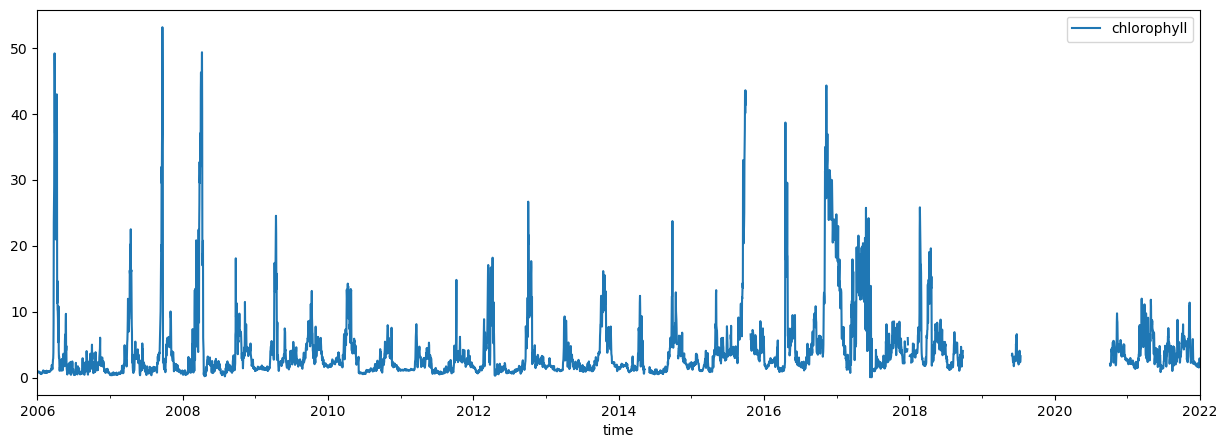

In [25]:
dr = ['2006-01-01','2022-01-01']
fig, ax = plt.subplots(1,1,figsize=(15, 5))
day_df[['chlorophyll']].loc[dr[0]:dr[1]].resample("D").mean().plot(style="-",ax=ax)
#day_df[['temperature']].loc[dr[0]:dr[1]].resample("D").mean().plot(style="-",ax=ax)
plt.legend(loc = 'upper right')

In [30]:
currents = make_df('A01_aanderaa_o2_all')

['station', 'mooring_site_desc', 'water_depth', 'time', 'longitude', 'latitude', 'depth', 'current_speed', 'current_speed_qc', 'current_direction', 'current_direction_qc', 'current_u', 'current_u_qc', 'current_v', 'current_v_qc', 'temperature', 'temperature_qc', 'dissolved_oxygen', 'dissolved_oxygen_qc', 'percent_oxygen_saturation', 'percent_oxygen_saturation_qc', 'time_created', 'time_modified']


In [29]:
currents['current_speed']

time
2018-07-10 20:00:00+00:00     2.93300
2018-07-10 21:00:00+00:00    14.95830
2018-07-10 22:00:00+00:00    18.47790
2018-07-10 23:00:00+00:00    14.37170
2018-07-11 00:00:00+00:00    17.01140
                               ...   
2023-04-11 18:00:00+00:00     7.51734
2023-04-11 19:00:00+00:00     4.62847
2023-04-11 20:00:00+00:00    19.29350
2023-04-11 21:00:00+00:00    19.19130
2023-04-11 22:00:00+00:00    28.12980
Name: current_speed, Length: 28954, dtype: float64

In [17]:
big_df[['depth1','temperature']].loc['2020-10-19'].plot()
big_df['temp_20'] = 

SyntaxError: invalid syntax (291228273.py, line 2)

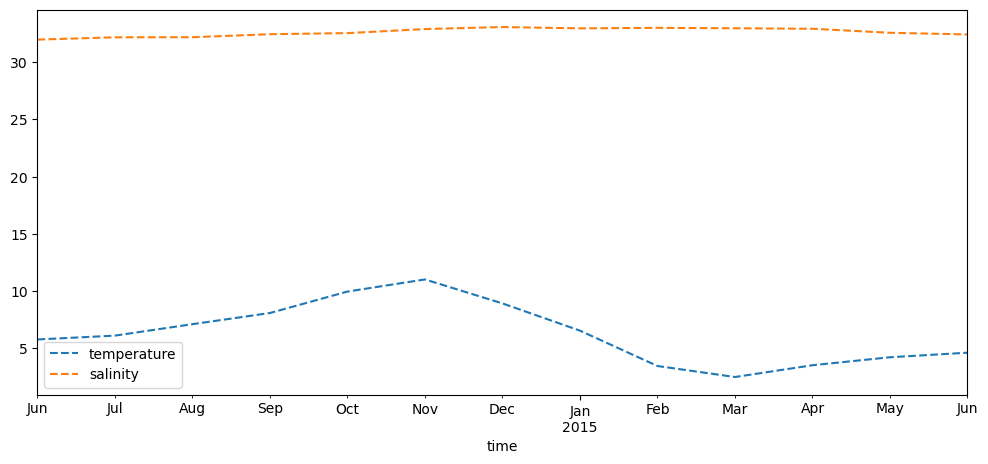

In [28]:
dr = ['2014-01-01','2018-08-01']
sal_df[['temperature','salinity']].loc[dr[0]:dr[1]].resample("M").mean().plot(style="--", figsize=(12, 5));

In [27]:
sal_df['2014']

/var/folders/g6/dvksyd2x2vzgtx4pt5g71bzh0000gn/T/ipykernel_9015/3905163693.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sal_df['2014']


,station,mooring_site_desc,dissolved_oxygen,oxygen_saturation,percent_oxygen_saturation,conductivity,temperature,salinity,sigma_t,longitude,latitude,depth
time,,,,,,,,,,,,
2014-06-04 01:00:00+00:00,A01,Massachusetts Bay,6.310979,7.221090,87.396484,30.940,5.034,32.039690,25.325370,-70.5655,42.523200,50.0
2014-06-04 02:00:00+00:00,A01,Massachusetts Bay,6.291374,7.231754,86.996506,30.894,4.971,32.047530,25.338450,-70.5655,42.523200,50.0
2014-06-04 03:00:00+00:00,A01,Massachusetts Bay,6.265983,7.228348,86.686240,30.935,4.980,32.085915,25.367880,-70.5655,42.523200,50.0
2014-06-04 04:00:00+00:00,A01,Massachusetts Bay,6.249856,7.219080,86.574135,30.984,5.031,32.092990,25.367920,-70.5655,42.523200,50.0
2014-06-04 05:00:00+00:00,A01,Massachusetts Bay,6.296538,7.209544,87.336150,31.036,5.083,32.102493,25.369740,-70.5655,42.523200,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00+00:00,A01,Massachusetts Bay,5.516907,6.675608,82.642770,34.403,8.130,32.918236,25.620450,-70.5655,42.522057,50.0
2014-12-31 20:00:00+00:00,A01,Massachusetts Bay,5.540043,6.678353,82.955230,34.392,8.110,32.925320,25.628944,-70.5655,42.522057,50.0
2014-12-31 21:00:00+00:00,A01,Massachusetts Bay,5.459473,6.706610,81.404366,34.218,7.930,32.909184,25.642492,-70.5655,42.522057,50.0


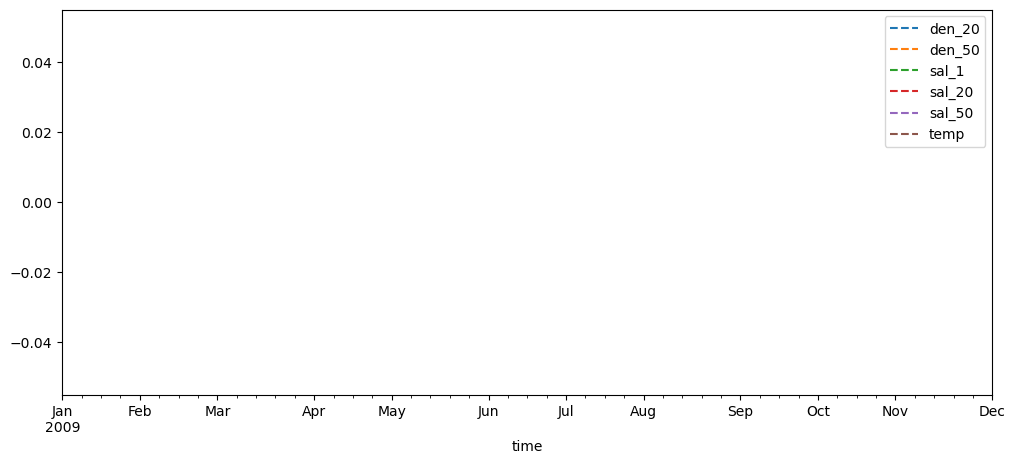

In [26]:
final_df.resample("W").mean().plot(style="--", figsize=(12, 5));

In [25]:
final_df

,den_20,den_50,sal_1,sal_20,sal_50,temp
time,,,,,,
2009-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:03:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:06:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:09:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2009-11-30 23:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2009-11-30 23:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2009-11-30 23:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
final_df = pd.DataFrame(raw_data,columns = ['den_20','den_50','sal_1','sal_20','sal_50','temp'])
final_df['time'] = pd.to_datetime(raw_data['Time-UTC'])
final_df = final_df.set_index('time')

In [23]:
raw_data = pd.read_csv('/Users/zoeshleifer/bouy_data.csv')
chloro_daily = raw_data.tail(335)[['A011m-Hourly-Density_kg/m^3','Time-UTC']]
raw_data = raw_data[:-335]

/var/folders/g6/dvksyd2x2vzgtx4pt5g71bzh0000gn/T/ipykernel_9015/3252481431.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('/Users/zoeshleifer/bouy_data.csv')


In [ ]:
fat_dict

In [762]:
buoy_cols = {}
buoy_times = {}
for buoy in UoM:
    unique_cols = set()
    unique_times = set()
    for i in  meta_dict[buoy]:
        unique_cols= unique_cols.union(set(meta_final[buoy][i]))
        unique_times 
    buoy_cols[buoy]=list(unique_cols)
    print(len(unique_cols))

47
45
22
30
29
53
28
26
37
56
19
27
30
19
50
47


In [766]:
B = 'A01'
dfB = pd.DataFrame(columns=buoy_cols[B])

In [764]:
dfB

,temperature,current_direction,swell_wave_period_3,swell_wave_height_3,transmissivity,current_speed,principal_wave_direction_3,wind_speed,percent_oxygen_saturation,current_u,...,barometric_pressure,time_modified,wave_steepness_3,chlorophyll,depth,significant_wave_height_3,principal_wave_direction_spread_3,visibility,dissolved_oxygen,water_depth


In [754]:
len(unique_cols)

47

  
  A01_aanderaa_hist  
  
  'station', 'time', 'mooring_site_desc', 'current_speed', 'current_speed_qc', 'current_direction', 'current_direction_qc', 'temperature', 'temperature_qc', 'longitude', 'latitude', 'depth'
  
  A01_aanderaa_o2_all  
  
  'station', 'mooring_site_desc', 'water_depth', 'time', 'longitude', 'latitude', 'depth', 'current_speed', 'current_speed_qc', 'current_direction', 'current_direction_qc', 'current_u', 'current_u_qc', 'current_v', 'current_v_qc', 'temperature', 'temperature_qc', 'dissolved_oxygen', 'dissolved_oxygen_qc', 'percent_oxygen_saturation', 'percent_oxygen_saturation_qc', 'time_created', 'time_modified'
  
  A01_accelerometer_all  
  
  'station', 'time', 'mooring_site_desc', 'significant_wave_height', 'significant_wave_height_qc', 'dominant_wave_period', 'dominant_wave_period_qc', 'longitude', 'latitude', 'depth'
  
  A01_waves_mstrain_all 
  
  'station', 'time', 'mooring_site_desc', 'water_depth', 'index', 'significant_wave_height_3', 'significant_wave_height_3_qc', 'maximum_wave_height_3', 'maximum_wave_height_3_qc', 'dominant_wave_period_3', 'dominant_wave_period_3_qc', 'mean_wave_direction_3', 'mean_wave_direction_3_qc', 'mean_wave_direction_spread_3', 'mean_wave_direction_spread_3_qc', 'principal_wave_direction_3', 'principal_wave_direction_3_qc', 'principal_wave_direction_spread_3', 'principal_wave_direction_spread_3_qc', 'swell_wave_height_3', 'swell_wave_height_3_qc', 'swell_wave_period_3', 'swell_wave_period_3_qc', 'wind_wave_height_3', 'wind_wave_height_3_qc', 'wind_wave_period_3', 'wind_wave_period_3_qc', 'swell_and_wind_wave_separation_frequency_3', 'swell_and_wind_wave_separation_frequency_3_qc', 'wave_steepness_3', 'wave_steepness_3_qc', 'offset_time', 'time_created', 'time_modified', 'longitude', 'latitude', 'depth'
  
  A01_met_all  
  
  'station', 'time', 'mooring_site_desc', 'air_temperature', 'air_temperature_qc', 'barometric_pressure', 'barometric_pressure_qc', 'wind_gust', 'wind_gust_qc', 'wind_speed', 'wind_speed_qc', 'wind_direction', 'wind_direction_qc', 'visibility', 'visibility_qc', 'longitude', 'latitude', 'depth'
  
  A01_optics_s_all  
  
  'station', 'mooring_site_desc', 'time',_A01_aanderaa_hist
  
  'station', 'time', 'mooring_site_desc', 'current_speed', 'current_speed_qc', 'current_direction', 'current_direction_qc', 'temperature', 'temperature_qc', 'longitude', 'latitude', 'depth'
  
  A01_aanderaa_o2_all  
  
  'station', 'mooring_site_desc', 'water_depth', 'time', 'longitude', 'latitude', 'depth', 'current_speed', 'current_speed_qc', 'current_direction', 'current_direction_qc', 'current_u', 'current_u_qc', 'current_v', 'current_v_qc', 'temperature', 'temperature_qc', 'dissolved_oxygen', 'dissolved_oxygen_qc', 'percent_oxygen_saturation', 'percent_oxygen_saturation_qc', 'time_created', 'time_modified'
  
  A01_accelerometer_all  
  
  'station', 'time', 'mooring_site_desc', 'significant_wave_height', 'significant_wave_height_qc', 'dominant_wave_period', 'dominant_wave_period_qc', 'longitude', 'latitude', 'depth'
  
  A01_waves_mstrain_all  
  
  'station', 'time', 'mooring_site_desc', 'water_depth', 'index', 'significant_wave_height_3', 'significant_wave_height_3_qc', 'maximum_wave_height_3', 'maximum_wave_height_3_qc', 'dominant_wave_period_3', 'dominant_wave_period_3_qc', 'mean_wave_direction_3', 'mean_wave_direction_3_qc', 'mean_wave_direction_spread_3', 'mean_wave_direction_spread_3_qc', 'principal_wave_direction_3', 'principal_wave_direction_3_qc', 'principal_wave_direction_spread_3', 'principal_wave_direction_spread_3_qc', 'swell_wave_height_3', 'swell_wave_height_3_qc', 'swell_wave_period_3', 'swell_wave_period_3_qc', 'wind_wave_height_3', 'wind_wave_height_3_qc', 'wind_wave_period_3', 'wind_wave_period_3_qc', 'swell_and_wind_wave_separation_frequency_3', 'swell_and_wind_wave_separation_frequency_3_qc', 'wave_steepness_3', 'wave_steepness_3_qc', 'offset_time', 'time_created', 'time_modified', 'longitude', 'latitude', 'depth'
  
  A01_met_all  
  
  'station', 'time', 'mooring_site_desc', 'air_temperature', 'air_temperature_qc', 'barometric_pressure', 'barometric_pressure_qc', 'wind_gust', 'wind_gust_qc', 'wind_speed', 'wind_speed_qc', 'wind_direction', 'wind_direction_qc', 'visibility', 'visibility_qc', 'longitude', 'latitude', 'depth'
  
  A01_optics_s_all  
  
  'station', 'mooring_site_desc', 'time', _'chlorophyll'_, 'chlorophyll_qc', 'turbidity', 'turbidity_qc', 'longitude', 'latitude', 'depth'
  
  A01_optode_all  
  
  'station', 'time', 'mooring_site_desc', 'dissolved_oxygen', 'dissolved_oxygen_qc', 'oxygen_saturation', 'oxygen_saturation_qc', 'percent_oxygen_saturation', 'percent_oxygen_saturation_qc', 'temperature', 'temperature_qc', 'time_created', 'time_modified', 'longitude', 'latitude', 'depth'
  
  A01_doppler_rt  
  
  'station', 'mooring_site_desc', 'water_depth', 'time', 'longitude', 'latitude', 'depth', 'offset_time', 'current_u', 'current_u_qc', 'current_v', 'current_v_qc'
  
  A01_sbe16_trans_all  
  
  'station', 'time', 'mooring_site_desc', 'water_depth', 'transmissivity_voltage', 'transmissivity_voltage_qc', 'transmissivity', 'transmissivity_qc', 'attenuation', 'attenuation_qc', 'conductivity', 'conductivity_qc', 'temperature', 'temperature_qc', 'salinity', 'salinity_qc', 'sigma_t', 'sigma_t_qc', 'time_created', 'time_modified', 'longitude', 'latitude', 'depth'
  
  A01_sbe16_disox_all  
  
  'station', 'time', 'mooring_site_desc', 'dissolved_oxygen', 'dissolved_oxygen_qc', 'oxygen_saturation', 'oxygen_saturation_qc', 'percent_oxygen_saturation', 'percent_oxygen_saturation_qc', 'conductivity', 'conductivity_qc', 'temperature', 'temperature_qc', 'salinity', 'salinity_qc', 'sigma_t', 'sigma_t_qc', 'longitude', 'latitude', 'depth'
  
  A01_sbe37_all  
  
  'station', 'time', 'mooring_site_desc', 'conductivity', 'conductivity_qc', 'temperature', 'temperature_qc', 'salinity', 'salinity_qc', 'sigma_t', 'sigma_t_qc', 'longitude', 'latitude', 'depth'_, 'chlorophyll_qc', 'turbidity', 'turbidity_qc', 'longitude', 'latitude', 'depth'
  
  A01_optode_all  
  
  'station', 'time', 'mooring_site_desc', 'dissolved_oxygen', 'dissolved_oxygen_qc', 'oxygen_saturation', 'oxygen_saturation_qc', 'percent_oxygen_saturation', 'percent_oxygen_saturation_qc', 'temperature', 'temperature_qc', 'time_created', 'time_modified', 'longitude', 'latitude', 'depth'
  
  A01_doppler_rt  
  
  'station', 'mooring_site_desc', 'water_depth', 'time', 'longitude', 'latitude', 'depth', 'offset_time', 'current_u', 'current_u_qc', 'current_v', 'current_v_qc'
  
  A01_sbe16_trans_all  
  
  'station', 'time', 'mooring_site_desc', 'water_depth', 'transmissivity_voltage', 'transmissivity_voltage_qc', 'transmissivity', 'transmissivity_qc', 'attenuation', 'attenuation_qc', 'conductivity', 'conductivity_qc', 'temperature', 'temperature_qc', 'salinity', 'salinity_qc', 'sigma_t', 'sigma_t_qc', 'time_created', 'time_modified', 'longitude', 'latitude', 'depth'
  
  A01_sbe16_disox_all  
  
  'station', 'time', 'mooring_site_desc', 'dissolved_oxygen', 'dissolved_oxygen_qc', 'oxygen_saturation', 'oxygen_saturation_qc', 'percent_oxygen_saturation', 'percent_oxygen_saturation_qc', 'conductivity', 'conductivity_qc', 'temperature', 'temperature_qc', 'salinity', 'salinity_qc', 'sigma_t', 'sigma_t_qc', 'longitude', 'latitude', 'depth'
  
  A01_sbe37_all  
  
  'station', 'time', 'mooring_site_desc', 'conductivity', 'conductivity_qc', 'temperature', 'temperature_qc', 'salinity', 'salinity_qc', 'sigma_t', 'sigma_t_qc', 'longitude', 'latitude', 'depth'